# Deep Planet Yield Preprocessing & EDA Notebook 

### Myer Ali Iqbal (220215075) Chirayu Yadav ( 220338617)  Akshita Ahuja ( 220783998)  Chungwen-Lin (210719211) & Umamah Qazi (220816160)



### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("yield.csv")

<Figure size 1200x600 with 0 Axes>

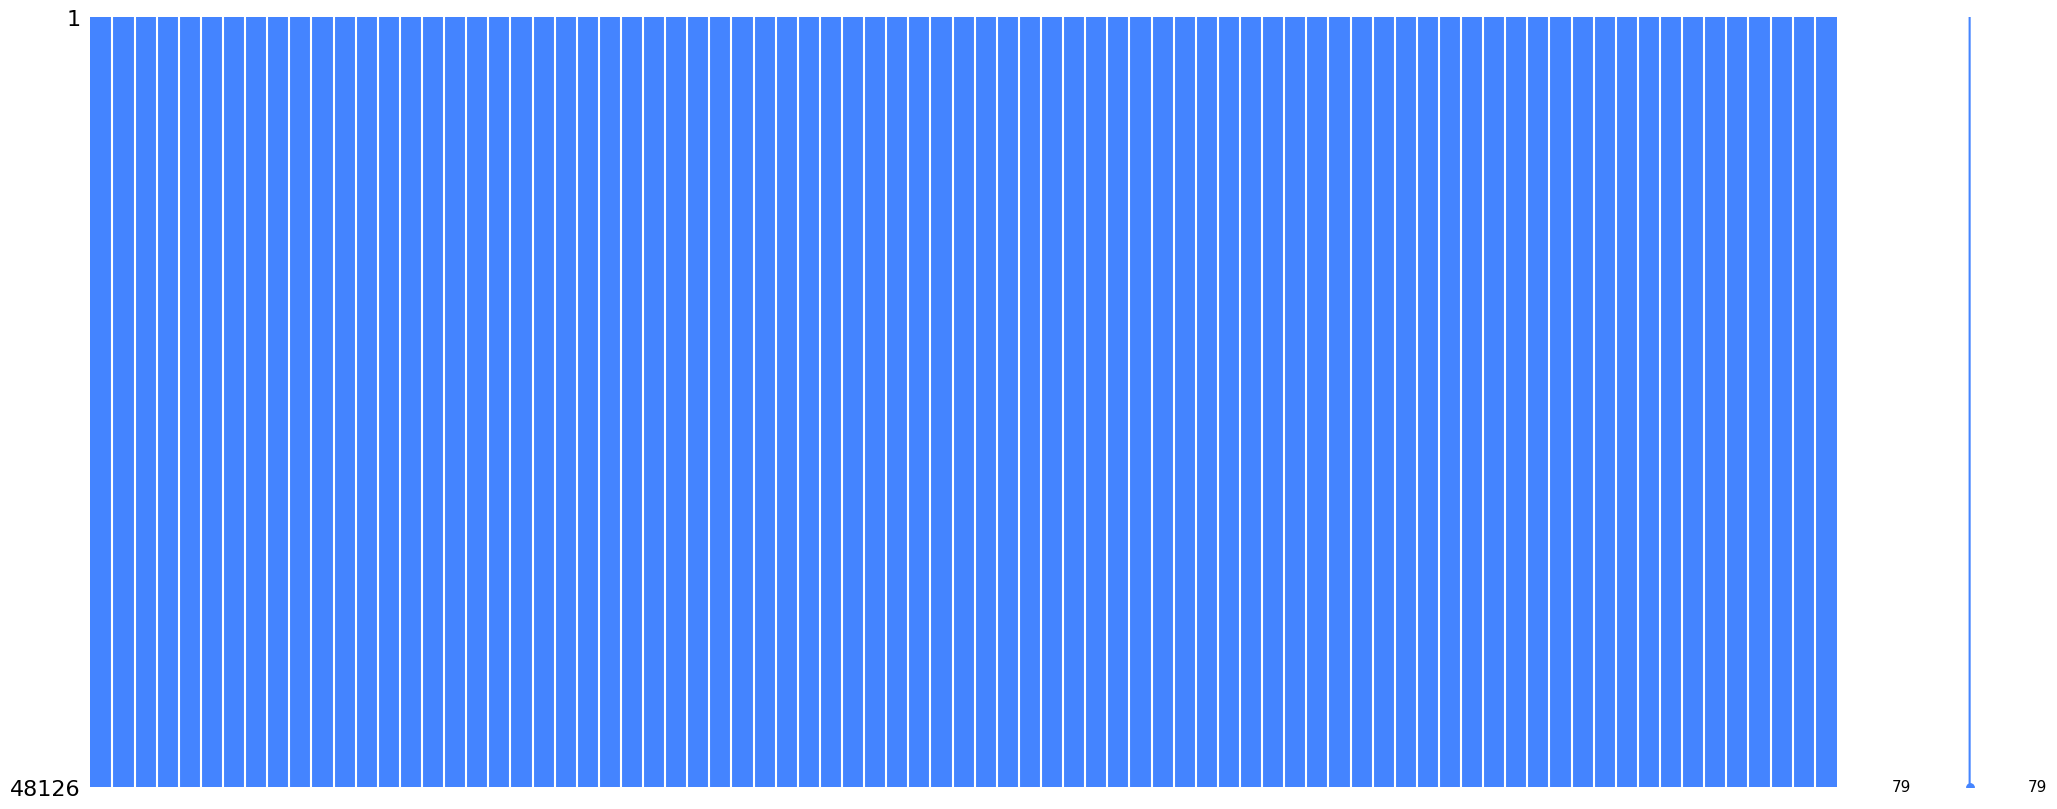

In [3]:
# Import the necessary libraries
import missingno as msno
import matplotlib.pyplot as plt

# Plot the missing values using msno's matrix function
plt.figure(figsize=(12, 6))
msno.matrix(data, fontsize=13, color=(0.27, 0.52, 1.0))
plt.xticks(rotation=90)  # This line is to rotate the feature names for better visibility if they are long
plt.show()


In [4]:
data.head()

Unnamed: 0 Vineyard_name Block_name  Season        Date         Variety  \
0           0           M33    M33SGRA    2017  02/03/2017  Sauvignon Gris   
1           1           M33    M00BGFA    2017  02/03/2017      Pinot Gris   
2           2           M33    C77IGMB    2017  02/03/2017      Pinot Gris   
3           3           M33    J44POPD    2017  02/03/2017      Pinot Noir   
4           4           M33    Q11WVWL    2017  02/03/2017      Pinot Noir   

   NDVImean      NDVIsum  NDWImean     NDWIsum  ...  Sauvignon Blanc  \
0  0.740918   700.908104  0.179463  169.771876  ...                0   
1  0.786083   517.242711  0.227985  150.013921  ...                0   
2  0.717883  1178.046488  0.158046  259.354077  ...                0   
3  0.732823   416.976093  0.182909  104.075383  ...                0   
4  0.782788   439.926718  0.234459  131.765965  ...                0   

   Sauvignon Gris  Syrah  YieldPerHec  YieldScale  High yield  Low yield  \
0               1      0     0.046232   Low yield           0          1   
1               0      0     0.065920   Low yield           0          1   
2               0      0     0.130192   Low yield           0          1   
3               0      0     0.039648   Low yield           0          1   
4               0      0     0.039964   Low yield           0          1   

   variety_idx  New_Longitude  New_Latitude  
0            1       6.915636     45.922095  
1            2       6.915636     45.922095  
2            2       6.915636     45.922095  
3            3       6.915636     45.922095  
4            3       6.915636     45.922095  

[5 rows x 79 columns]

### checking for null & missing values

In [5]:
data.isnull()

Unnamed: 0  Vineyard_name  Block_name  Season   Date  Variety  \
0           False          False       False   False  False    False   
1           False          False       False   False  False    False   
2           False          False       False   False  False    False   
3           False          False       False   False  False    False   
4           False          False       False   False  False    False   
...           ...            ...         ...     ...    ...      ...   
48121       False          False       False   False  False    False   
48122       False          False       False   False  False    False   
48123       False          False       False   False  False    False   
48124       False          False       False   False  False    False   
48125       False          False       False   False  False    False   

       NDVImean  NDVIsum  NDWImean  NDWIsum  ...  Sauvignon Blanc  \
0         False    False     False    False  ...            False   
1         False    False     False    False  ...            False   
2         False    False     False    False  ...            False   
3         False    False     False    False  ...            False   
4         False    False     False    False  ...            False   
...         ...      ...       ...      ...  ...              ...   
48121     False    False     False    False  ...            False   
48122     False    False     False    False  ...            False   
48123     False    False     False    False  ...            False   
48124     False    False     False    False  ...            False   
48125     False    False     False    False  ...            False   

       Sauvignon Gris  Syrah  YieldPerHec  YieldScale  High yield  Low yield  \
0               False  False        False       False       False      False   
1               False  False        False       False       False      False   
2               False  False        False       False       False      False   
3               False  False        False       False       False      False   
4               False  False        False       False       False      False   
...               ...    ...          ...         ...         ...        ...   
48121           False  False        False       False       False      False   
48122           False  False        False       False       False      False   
48123           False  False        False       False       False      False   
48124           False  False        False       False       False      False   
48125           False  False        False       False       False      False   

       variety_idx  New_Longitude  New_Latitude  
0            False          False         False  
1            False          False         False  
2            False          False         False  
3            False          False         False  
4            False          False         False  
...            ...            ...           ...  
48121        False          False         False  
48122        False          False         False  
48123        False          False         False  
48124        False          False         False  
48125        False          False         False  

[48126 rows x 79 columns]

In [6]:
data.isnull().sum()

Unnamed: 0       0
Vineyard_name    0
Block_name       0
Season           0
Date             0
                ..
High yield       0
Low yield        0
variety_idx      0
New_Longitude    0
New_Latitude     0
Length: 79, dtype: int64

In [7]:
percent_missing=data.isnull().sum()*100/len(data)

In [8]:
missing_value_df=pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing})

In [9]:
missing_value_df

column_name  percent_missing
Unnamed: 0        Unnamed: 0              0.0
Vineyard_name  Vineyard_name              0.0
Block_name        Block_name              0.0
Season                Season              0.0
Date                    Date              0.0
...                      ...              ...
High yield        High yield              0.0
Low yield          Low yield              0.0
variety_idx      variety_idx              0.0
New_Longitude  New_Longitude              0.0
New_Latitude    New_Latitude              0.0

[79 rows x 2 columns]

In [10]:
# renaming columns
data.drop(['Unnamed: 0', 'Cabernet Sauvignon','Chardonnay','Marzemino','Merlot','Pinot Gris','Pinot Noir','Rare Red','Rare White','Riesling','Sauvignon Blanc','Sauvignon Gris','Syrah','variety_idx'], axis=1, inplace=True)
sum_columns = data.filter(regex='sum').columns
data = data.drop(sum_columns, axis=1)


## Correlation 

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['SizeClass'] = data['SizeClass'].astype('category')
data['Vineyard_name'] = data['Vineyard_name'].astype(str)
data['Block_name'] = data['Block_name'].astype(str)
data['Season'] = pd.to_datetime(data['Season'], format='%Y')


In [12]:
numeric_data = data.select_dtypes(include=[np.number])
corr=numeric_data.corr()

corr['YieldPerHec']

NDVImean                  0.205948
NDWImean                  0.210782
NDVIRemean                0.170536
TCARImean                -0.039598
SIPImean                  0.196880
RRENDVImean               0.216607
RN2NDVImean               0.198968
GNDVImean                 0.209443
MSRmean                   0.196883
RVImean                   0.146677
N2NDVImean                0.206333
RENDVI1mean               0.230200
RENDVI2mean               0.231765
RDVI1mean                 0.160894
RDVI2mean                 0.206333
TDVImean                  0.129224
TDVI2mean                 0.132599
NLImean                   0.189451
LAIGmean                  0.231765
SMmean                    0.144465
GDD                       0.090256
Rainfall                  0.037374
Yield                     0.523180
Size                      0.157723
Ha                        0.148584
TimeTo                   -0.019859
BlockAverage              0.402457
VineyardVarietyAverage    0.536731
HeatShock           

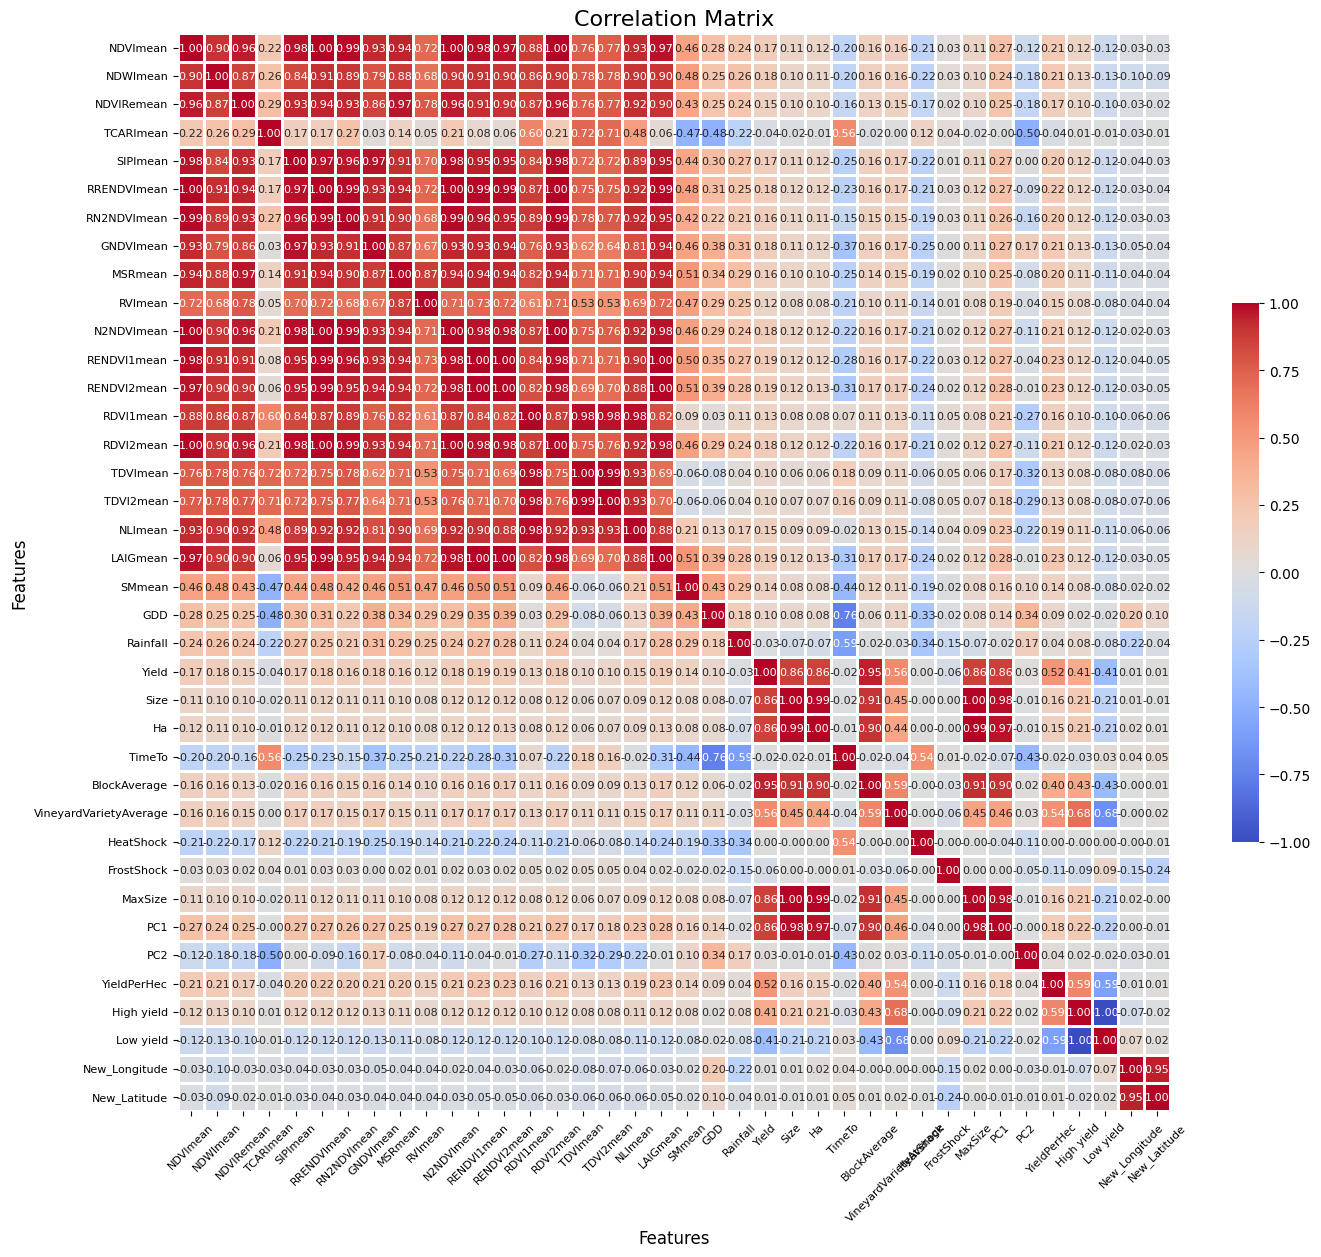

In [13]:
# Set up the figure size
plt.figure(figsize=(16, 14))

# Create the heatmap using clustered data
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.75,
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot_kws={"fontsize": 8}, cbar_kws={"shrink": 0.5},
            )

# Set the title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

# Display the heatmap
plt.show()

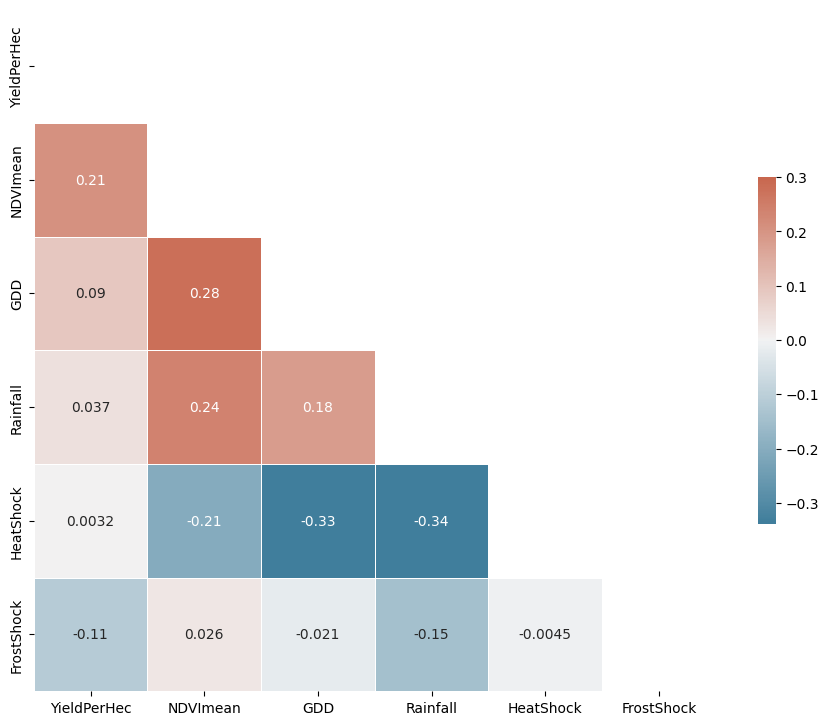

In [14]:
# Select relevant columns
selected_columns = ['YieldPerHec', 'NDVImean', 'GDD', 'Rainfall', 'HeatShock', 'FrostShock']
df_selected = data[selected_columns]

# Compute the correlation matrix
corr = df_selected.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()



The correlation heatmap provides a visual representation of the correlation coefficients among the selected variables. The color and intensity of the squares indicate the sign (positive or negative) and strength of the correlation, respectively. The correlation values are also annotated on the squares.

From the heatmap, we can observe that:

-YieldPerHec has a relatively stronger positive correlation with NDVImean, which is consistent with our earlier analysis.

-YieldPerHec has a very weak positive correlation with GDD and Rainfall.

-HeatShock and FrostShock have negligible correlation with YieldPerHec, indicating that these variables might not be very useful for predicting yield.

-Among the predictors, NDVImean and GDD have a moderately positive correlation. This might suggest that higher temperatures (more growing degree days) are associated with healthier or denser vegetation (higher NDVI).

Keep in mind that correlation does not imply causation. While these variables may be correlated with yield, they may not necessarily cause changes in yield. There could be other confounding variables that are causing changes in both. Furthermore, the relationships between these variables and yield may not be linear, and therefore may not be fully captured by the Pearson correlation coefficient.

In [15]:
# Compute the correlation coefficients between YieldPerHec and the selected variables
correlations = data[["YieldPerHec", "NDVImean", "GDD", "Rainfall","TimeTo"]].corr()

# Display the correlation coefficients
correlations


YieldPerHec  NDVImean       GDD  Rainfall    TimeTo
YieldPerHec     1.000000  0.205948  0.090256  0.037374 -0.019859
NDVImean        0.205948  1.000000  0.278975  0.238254 -0.202682
GDD             0.090256  0.278975  1.000000  0.182497 -0.757401
Rainfall        0.037374  0.238254  0.182497  1.000000 -0.594499
TimeTo         -0.019859 -0.202682 -0.757401 -0.594499  1.000000

Here are the correlation coefficients between YieldPerHec (yield per hectare) and the other three continuous variables:

1.YieldPerHec and NDVImean: The correlation coefficient is approximately 0.206, indicating a weak positive linear relationship. This suggests that higher NDVI values might be associated with higher yields, which is consistent with our earlier observation.

2.YieldPerHec and GDD (Growing Degree Days): The correlation coefficient is approximately 0.090, indicating a very weak positive linear relationship. This suggests that the impact of GDD on yield is not very strong and that other factors might be more influential.

3.YieldPerHec and Rainfall: The correlation coefficient is approximately 0.037, indicating a very weak positive linear relationship. This suggests that rainfall might not have a strong direct impact on yield.

Next, let's look at the impact of grape variety on yield. Since grape variety is a categorical variable, we cannot compute a correlation coefficient. Instead, we can perform an ANOVA (Analysis of Variance) test to see if the mean yield is significantly different between the varieties. If the p-value from the ANOVA test is less than 0.05, we can conclude that there is a significant difference in yield between at least two grape varieties. Let's perform this test.m

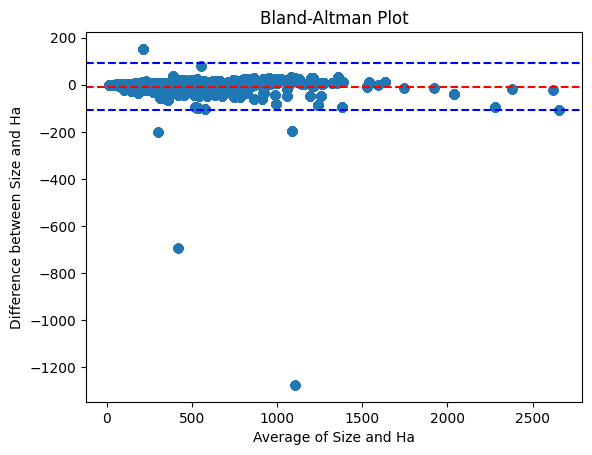

In [16]:
import numpy as np

means = np.mean([data['Size'], data['Ha']], axis=0)
diffs = data['Size'] - data['Ha']
plt.scatter(means, diffs)
plt.axhline(np.mean(diffs), color='red', linestyle='--')  # Mean difference line
plt.axhline(np.mean(diffs) + 1.96*np.std(diffs), color='blue', linestyle='--')  # Upper limit of agreement
plt.axhline(np.mean(diffs) - 1.96*np.std(diffs), color='blue', linestyle='--')  # Lower limit of agreement
plt.xlabel('Average of Size and Ha')
plt.ylabel('Difference between Size and Ha')
plt.title('Bland-Altman Plot')
plt.show()


In [17]:
diffs = data['Size'] - data['Ha']
mean_diff = np.mean(diffs)
std_diff = np.std(diffs)

upper_limit = mean_diff + 1.96*std_diff
lower_limit = mean_diff - 1.96*std_diff

outliers = data[(diffs > upper_limit) | (diffs < lower_limit)]


In [18]:
print(outliers)
print(f'Number of outliers: {len(outliers)}')


      Vineyard_name Block_name     Season       Date          Variety  \
17              M33    H22QZLN 2017-01-01 2017-03-02  Sauvignon Blanc   
43              M33    H22QZLN 2017-01-01 2017-02-20  Sauvignon Blanc   
69              M33    H22QZLN 2017-01-01 2016-12-15  Sauvignon Blanc   
95              M33    H22QZLN 2017-01-01 2017-02-10  Sauvignon Blanc   
121             M33    H22QZLN 2017-01-01 2016-12-25  Sauvignon Blanc   
...             ...        ...        ...        ...              ...   
36855           TSH    EDRLUGW 2021-01-01 2020-09-27  Sauvignon Blanc   
36857           TSH    LKYSCNF 2021-01-01 2020-09-27  Sauvignon Blanc   
36858           TSH    IHVYFCB 2021-01-01 2021-01-30       Chardonnay   
36860           TSH    EDRLUGW 2021-01-01 2021-01-30  Sauvignon Blanc   
36862           TSH    LKYSCNF 2021-01-01 2021-01-30  Sauvignon Blanc   

       NDVImean  NDWImean  NDVIRemean  TCARImean  SIPImean  ...  FrostShock  \
17     0.779165  0.191844    0.446854   0.15

In [19]:
import pandas as pd
import numpy as np

# Calculate the differences between 'Size' and 'Ha'
diffs = data['Size'] - data['Ha']

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(diffs)
std_diff = np.std(diffs)

# Calculate the upper and lower limits of agreement
upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

# Create a mask that selects only the rows where the difference falls outside the limits
outliers_mask = (diffs > upper_limit) | (diffs < lower_limit)

# Use the mask to select the corresponding rows from the original DataFrame
outliers = data[outliers_mask]

# Check the new DataFrame
print(outliers)


      Vineyard_name Block_name     Season       Date          Variety  \
17              M33    H22QZLN 2017-01-01 2017-03-02  Sauvignon Blanc   
43              M33    H22QZLN 2017-01-01 2017-02-20  Sauvignon Blanc   
69              M33    H22QZLN 2017-01-01 2016-12-15  Sauvignon Blanc   
95              M33    H22QZLN 2017-01-01 2017-02-10  Sauvignon Blanc   
121             M33    H22QZLN 2017-01-01 2016-12-25  Sauvignon Blanc   
...             ...        ...        ...        ...              ...   
36855           TSH    EDRLUGW 2021-01-01 2020-09-27  Sauvignon Blanc   
36857           TSH    LKYSCNF 2021-01-01 2020-09-27  Sauvignon Blanc   
36858           TSH    IHVYFCB 2021-01-01 2021-01-30       Chardonnay   
36860           TSH    EDRLUGW 2021-01-01 2021-01-30  Sauvignon Blanc   
36862           TSH    LKYSCNF 2021-01-01 2021-01-30  Sauvignon Blanc   

       NDVImean  NDWImean  NDVIRemean  TCARImean  SIPImean  ...  FrostShock  \
17     0.779165  0.191844    0.446854   0.15

### Descriptive Stats

In [20]:
# General statistics
general_stats = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

general_stats, missing_values[missing_values > 0]

c:\users\myer1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


(       Vineyard_name Block_name               Season                 Date  \
 count          48126      48126                48126                48126   
 unique            27        489                    5                  258   
 top              L14    X30HQCY  2019-01-01 00:00:00  2020-02-10 00:00:00   
 freq            6181        133                11660                  446   
 first            NaN        NaN  2017-01-01 00:00:00  2016-12-09 00:00:00   
 last             NaN        NaN  2021-01-01 00:00:00  2021-04-05 00:00:00   
 mean             NaN        NaN                  NaN                  NaN   
 std              NaN        NaN                  NaN                  NaN   
 min              NaN        NaN                  NaN                  NaN   
 25%              NaN        NaN                  NaN                  NaN   
 50%              NaN        NaN                  NaN                  NaN   
 75%              NaN        NaN                  NaN           

## The general statistics show the count, mean, standard deviation, minimum, quartiles, and maximum values for each column in the dataset. For categorical variables, the top (most frequent) category and its frequency are also shown. From the missing values analysis, it seems there are no missing values in any of the columns. This is good news for data analysis as no imputation or dropping of missing values is needed.

## Let's continue by visualizing the distributions of some key variables. This can provide insights into the data, reveal patterns, and help to identify potential outliers or errors. The variables I suggest to start with are:

### 1.YieldPerHec: Yield per hectare, our main variable of interest.

### 2.NDVImean, NDWIsum: The vegetation and water indices.

### 3.GrowingDegreeDays: The temperature impact on the yield.

### 4.RainfallSum: The rainfall impact on the yield.

### 5.Variety: Grape variety.

### We can use histograms for the continuous variables and bar plots for the categorical variable (Variety).

In [21]:
data.columns

Index(['Vineyard_name', 'Block_name', 'Season', 'Date', 'Variety', 'NDVImean',
       'NDWImean', 'NDVIRemean', 'TCARImean', 'SIPImean', 'RRENDVImean',
       'RN2NDVImean', 'GNDVImean', 'MSRmean', 'RVImean', 'N2NDVImean',
       'RENDVI1mean', 'RENDVI2mean', 'RDVI1mean', 'RDVI2mean', 'TDVImean',
       'TDVI2mean', 'NLImean', 'LAIGmean', 'SMmean', 'GDD', 'Rainfall',
       'Yield', 'Size', 'Ha', 'SizeClass', 'TimeTo', 'BlockAverage',
       'VineyardVarietyAverage', 'HeatShock', 'FrostShock', 'MaxSize', 'PC1',
       'PC2', 'YieldPerHec', 'YieldScale', 'High yield', 'Low yield',
       'New_Longitude', 'New_Latitude'],
      dtype='object')

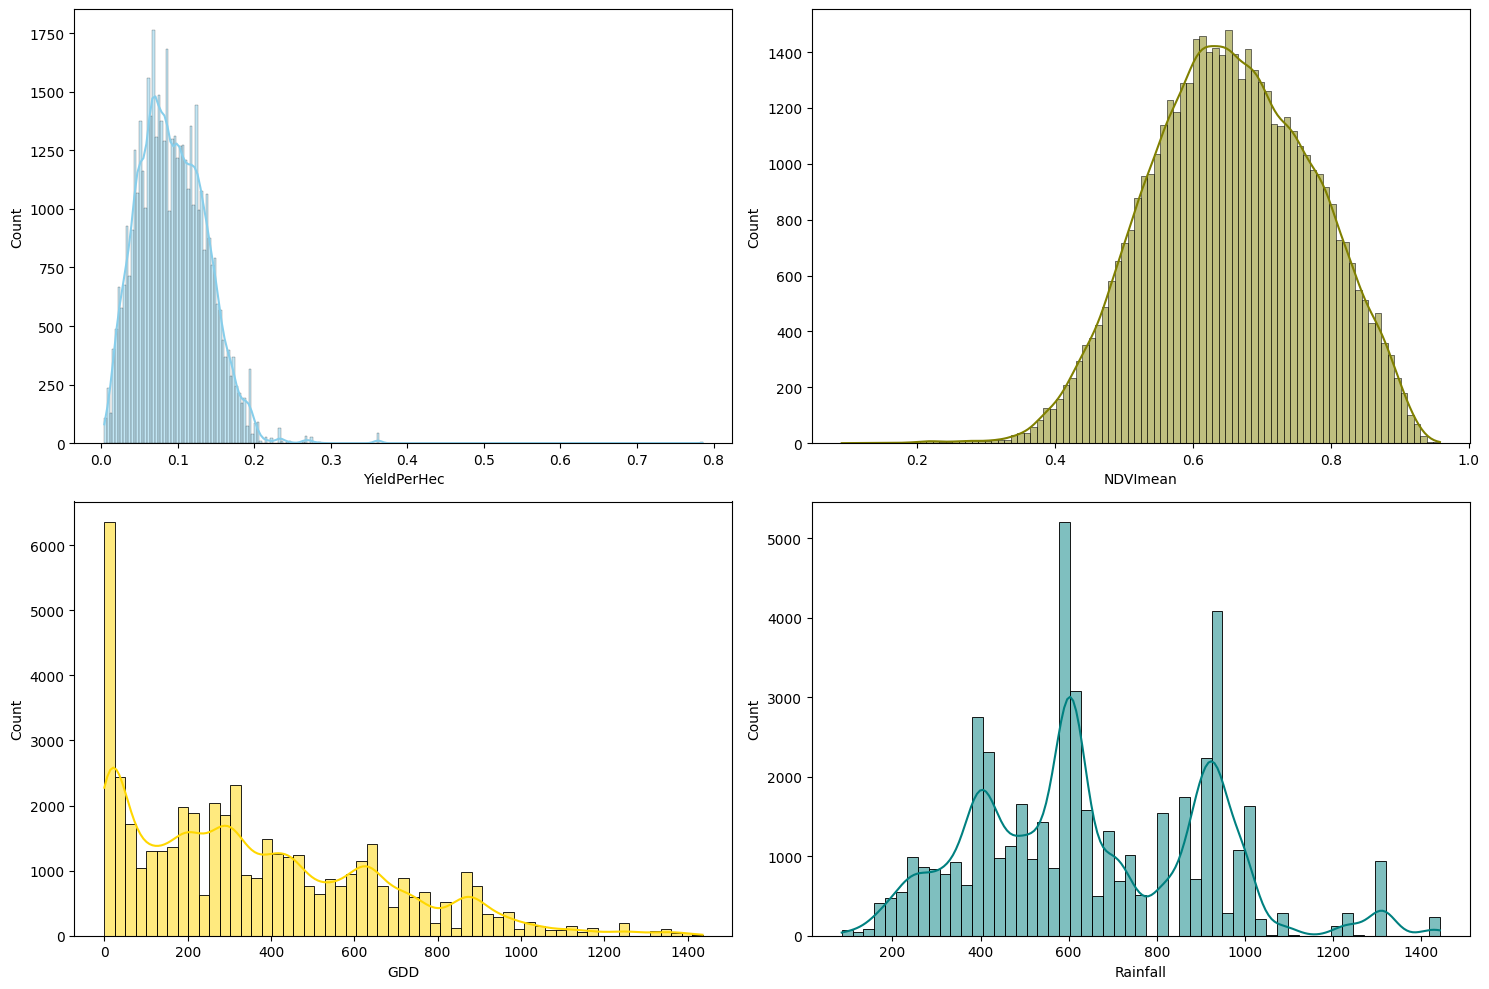

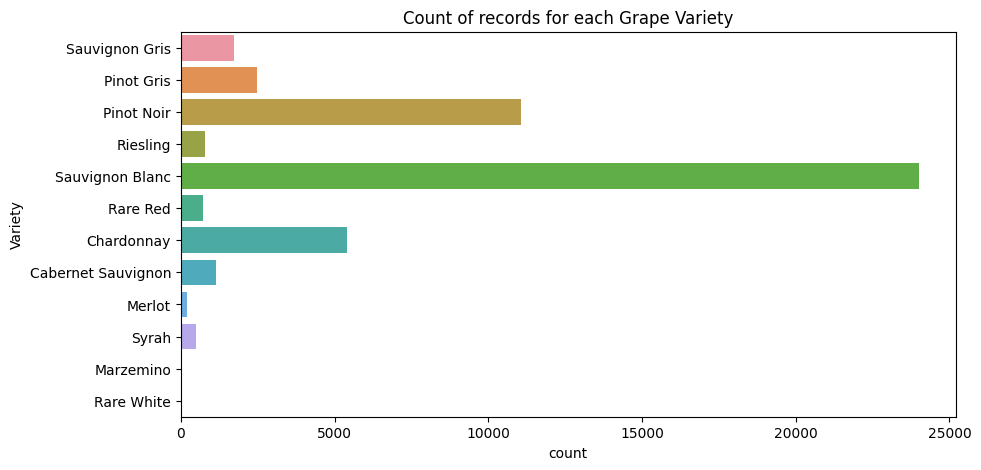

In [22]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,2, figsize=(15, 10))

# Plot a histogram and kernel density estimate for YieldPerHec
sns.histplot(data=data, x="YieldPerHec", kde=True, color="skyblue", ax=axes[0, 0])

# Plot a histogram and kernel density estimate for NDVImean
sns.histplot(data=data, x="NDVImean", kde=True, color="olive", ax=axes[0, 1])

# Plot a histogram and kernel density estimate for GDD
sns.histplot(data=data, x="GDD", kde=True, color="gold", ax=axes[1, 0])

# Plot a histogram and kernel density estimate for Rainfall
sns.histplot(data=data, x="Rainfall", kde=True, color="teal", ax=axes[1, 1])







plt.tight_layout()
plt.show()

# Plot a bar plot for Variety
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y="Variety")
plt.title('Count of records for each Grape Variety')
plt.show()


Correlation of NDVImean with yield: 0.20594786345496885
Correlation of NDWImean with yield: 0.21078239555667885
Correlation of SIPImean with yield: 0.19688039946806618
Correlation of RRENDVImean with yield: 0.21660672807133538
Correlation of GNDVImean with yield: 0.20944345086396746
Correlation of RVImean with yield: 0.1466769867742686


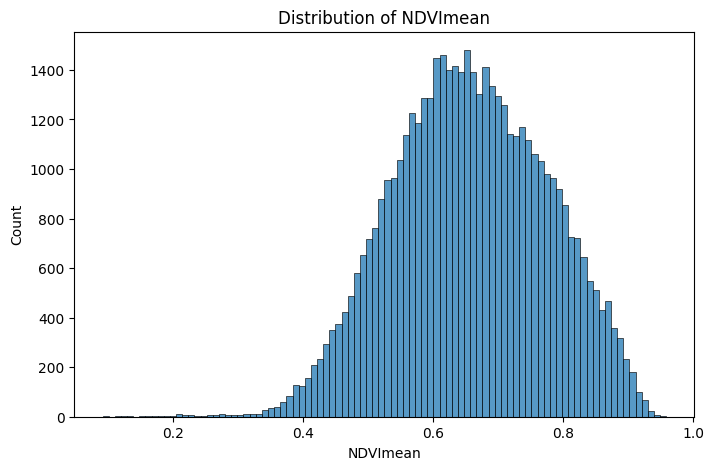

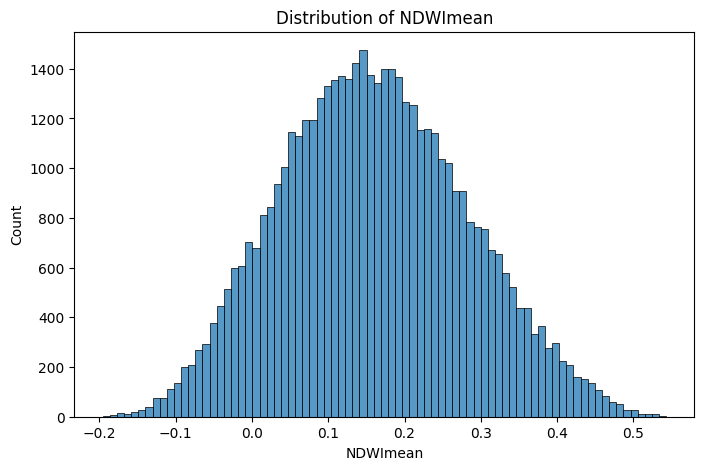

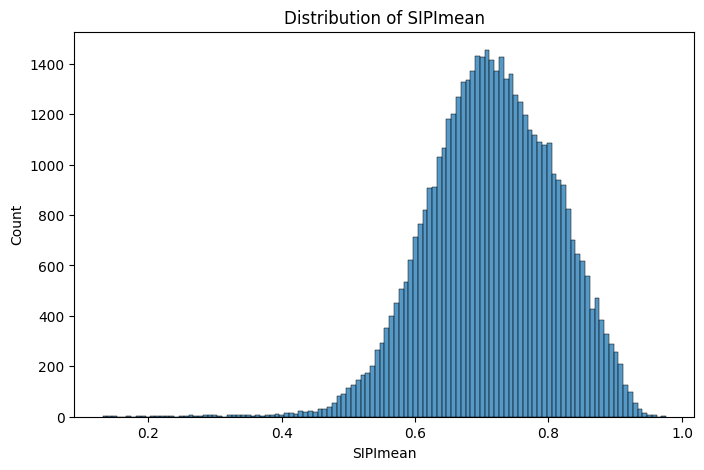

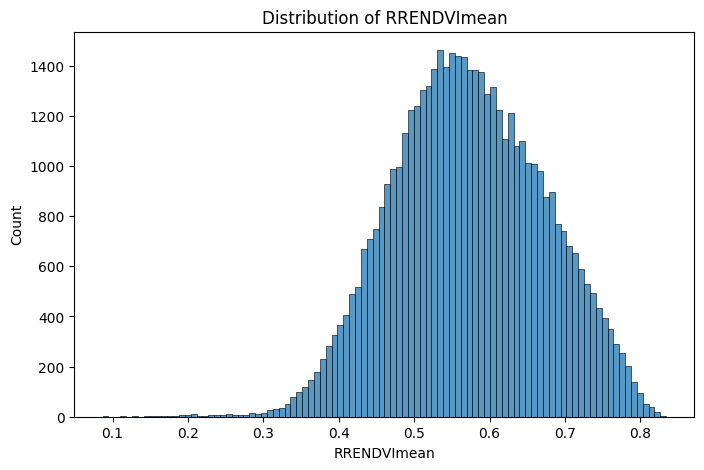

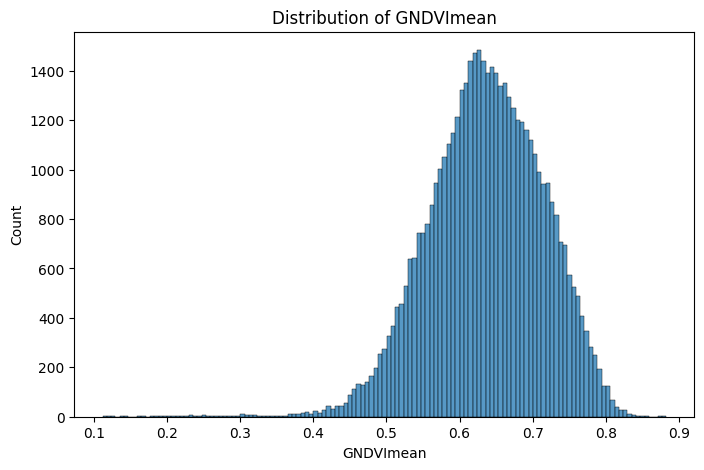

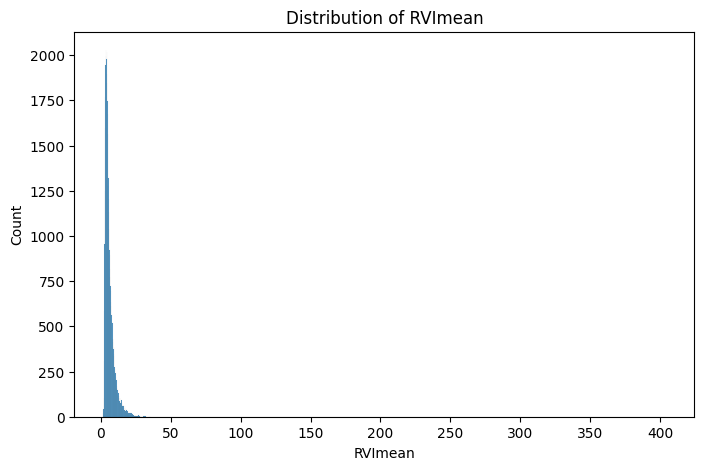

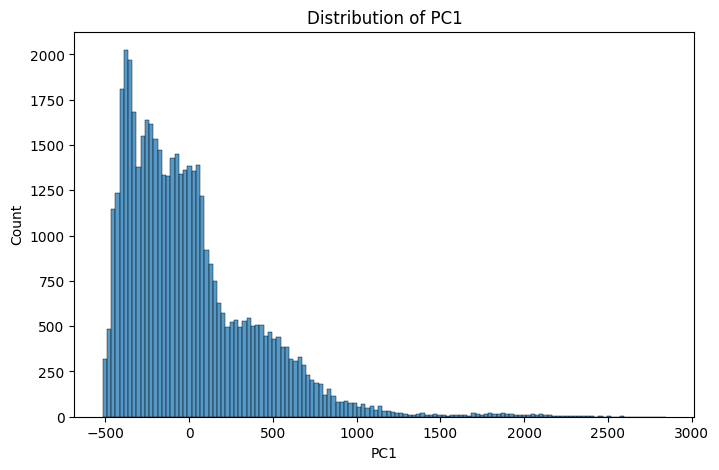

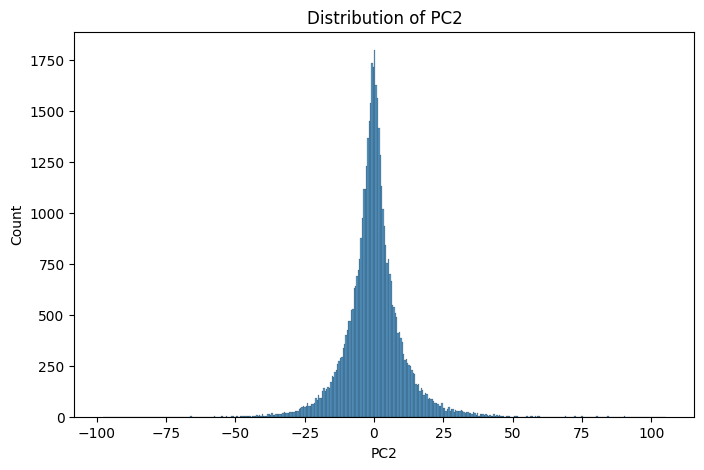

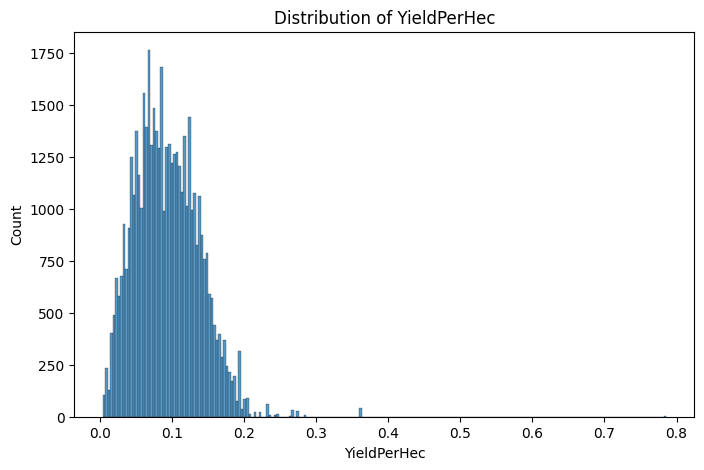

In [23]:
indices = ['NDVImean', 'NDWImean', 'SIPImean', 'RRENDVImean', 'GNDVImean', 'RVImean'] 

for index in indices:
    correlation = data[index].corr(data['YieldPerHec'])
    print(f'Correlation of {index} with yield: {correlation}')

import seaborn as sns
import matplotlib.pyplot as plt

for index in indices:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[index])
    plt.title(f'Distribution of {index}')
    plt.show()

for var in ['PC1', 'PC2', 'YieldPerHec']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var])
    plt.title(f'Distribution of {var}')
    plt.show()


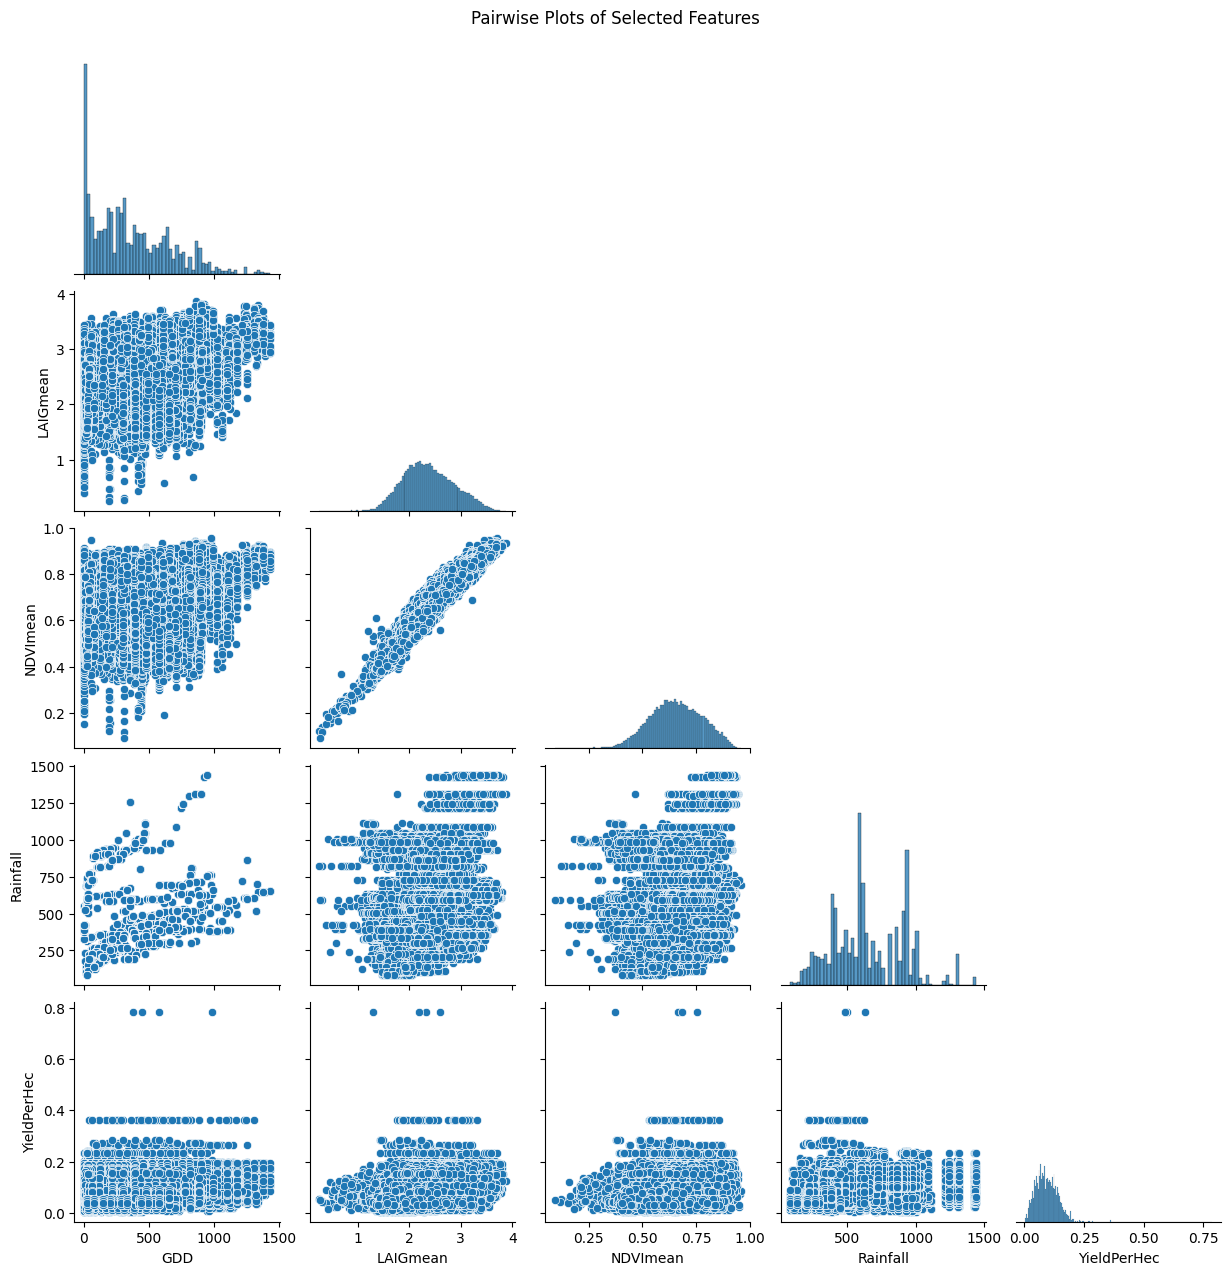

In [32]:
# Import necessary libraries
import pandas as pd
import seaborn as sns


# Define the features of interest for the pairplot
selected_features = ['GDD', 'LAIGmean', 'NDVImean', 'Rainfall', 'YieldPerHec']

# Create and display the pairplot
sns.pairplot(data[selected_features], kind='scatter', corner=True)
plt.suptitle('Pairwise Plots of Selected Features', y=1.02)
plt.show()


## Identifying Outliers

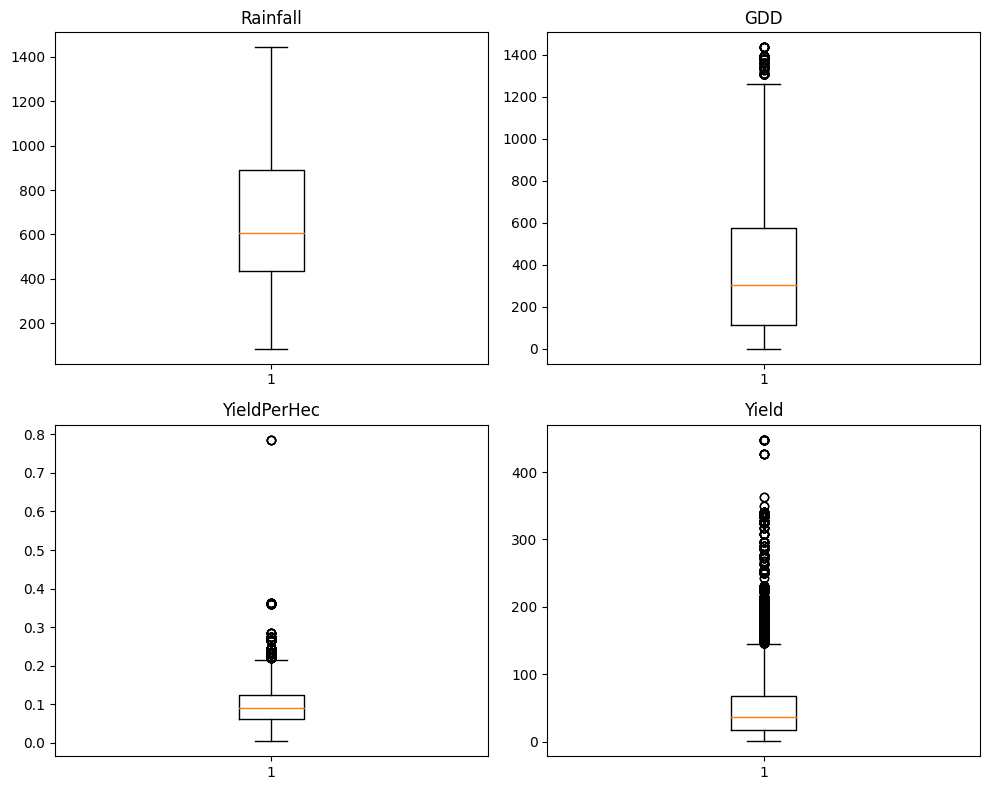

In [24]:
import matplotlib.pyplot as plt

# define the numerical columns
numerical_columns = ['Rainfall', 'GDD', 'YieldPerHec','Yield']

# create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# create a box plot for each column in the DataFrame
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_columns):
        col = numerical_columns[i]
        ax.boxplot(data[col])
        ax.set_title(col)

# adjust the spacing between subplots
plt.tight_layout()

# display the plot
plt.show()


# Factors Affecting Yield

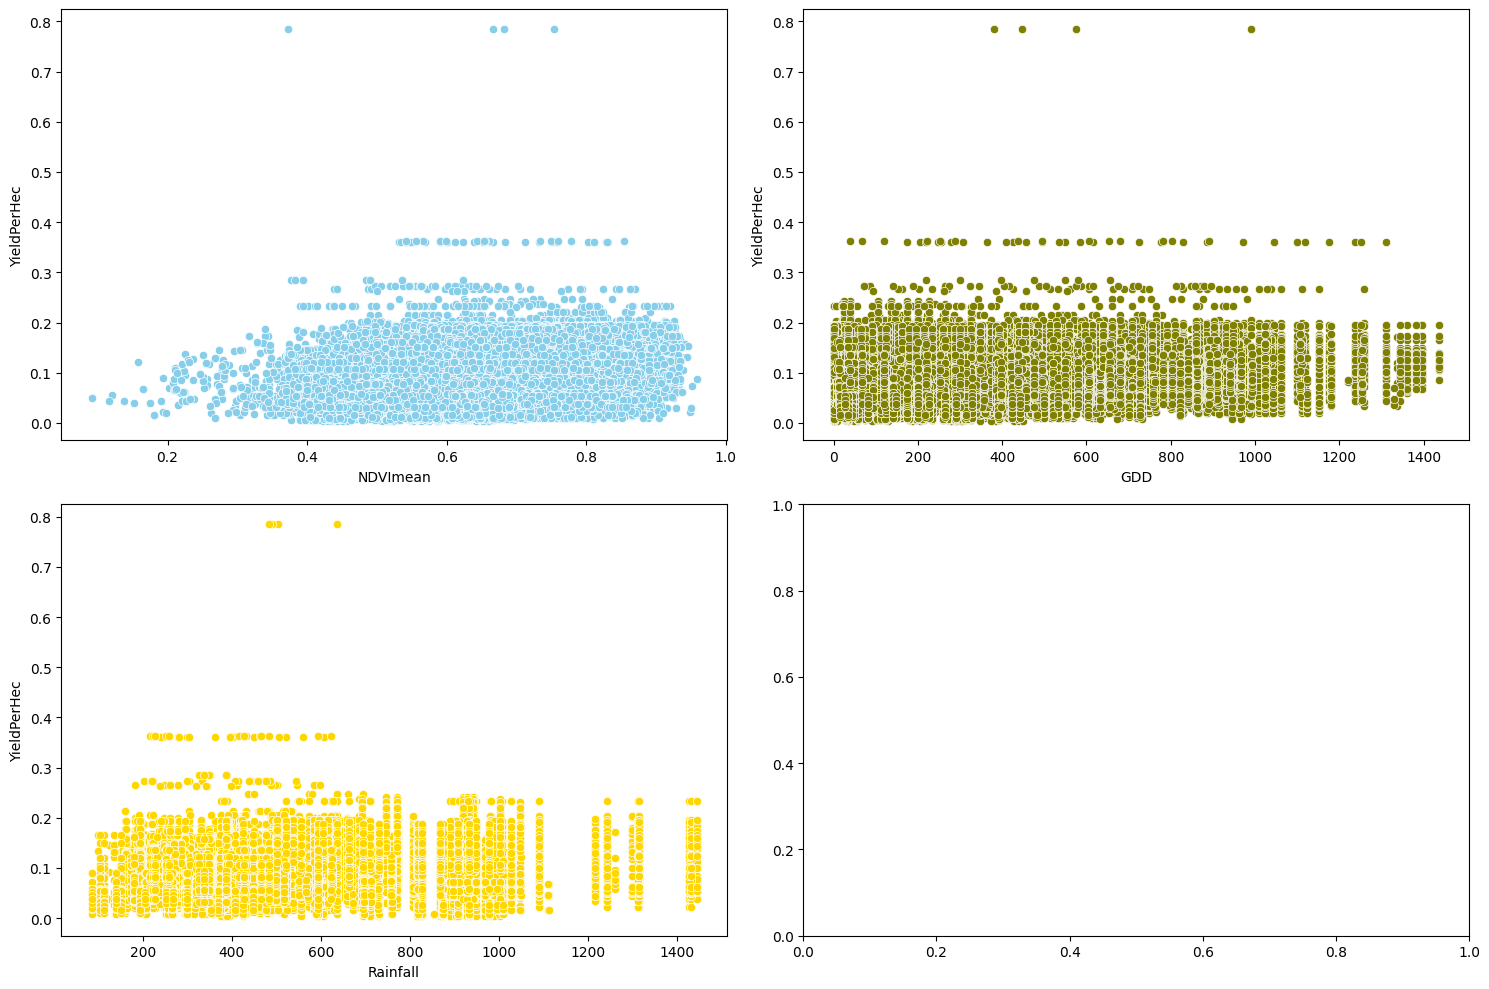

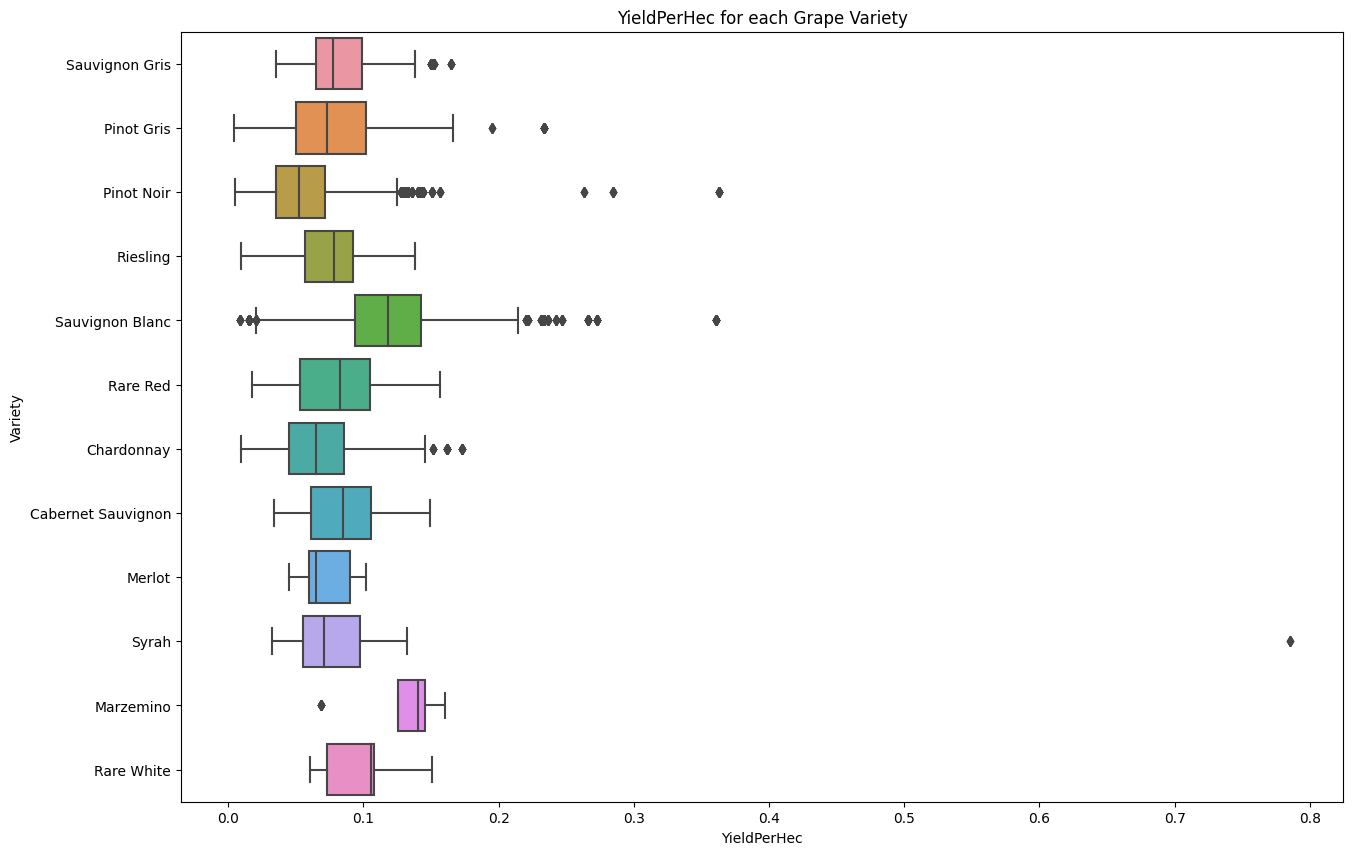

In [25]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot a scatter plot for YieldPerHec vs NDVImean
sns.scatterplot(data=data, x="NDVImean", y="YieldPerHec", color="skyblue", ax=axes[0, 0])

# Plot a scatter plot for YieldPerHec vs GDD
sns.scatterplot(data=data, x="GDD", y="YieldPerHec", color="olive", ax=axes[0, 1])

# Plot a scatter plot for YieldPerHec vs Rainfall
sns.scatterplot(data=data, x="Rainfall", y="YieldPerHec", color="gold", ax=axes[1, 0])

plt.tight_layout()
plt.show()

# Plot a box plot for YieldPerHec vs Variety
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="YieldPerHec", y="Variety")
plt.title('YieldPerHec for each Grape Variety')
plt.show()

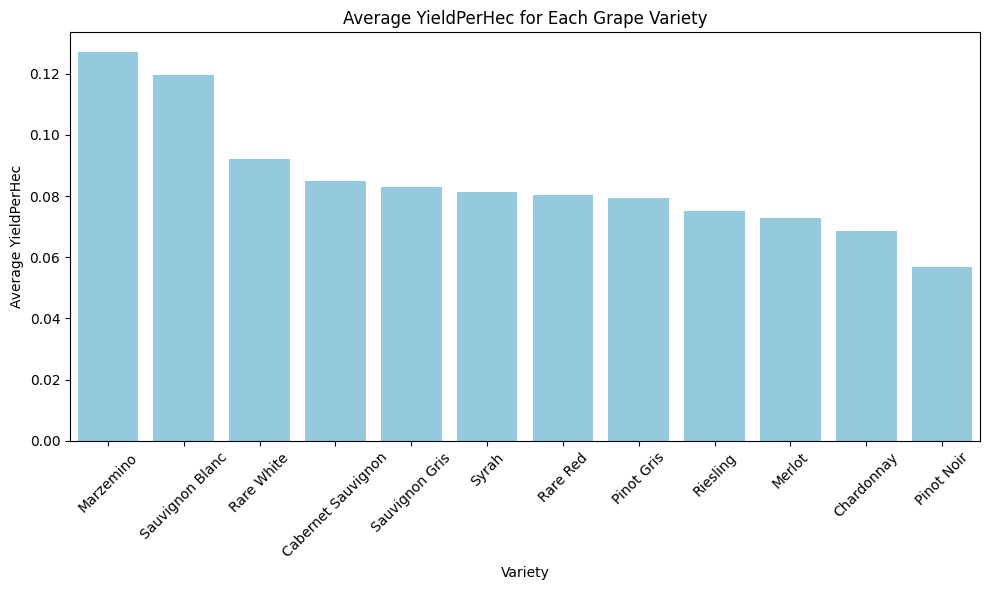

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average YieldPerHec for each variety
average_yield = data.groupby('Variety')['YieldPerHec'].mean().sort_values(ascending=False)

# Plot the average YieldPerHec for each variety
plt.figure(figsize=(10, 6))
sns.barplot(x=average_yield.index, y=average_yield.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Variety')
plt.ylabel('Average YieldPerHec')
plt.title('Average YieldPerHec for Each Grape Variety')
plt.tight_layout()
plt.show()

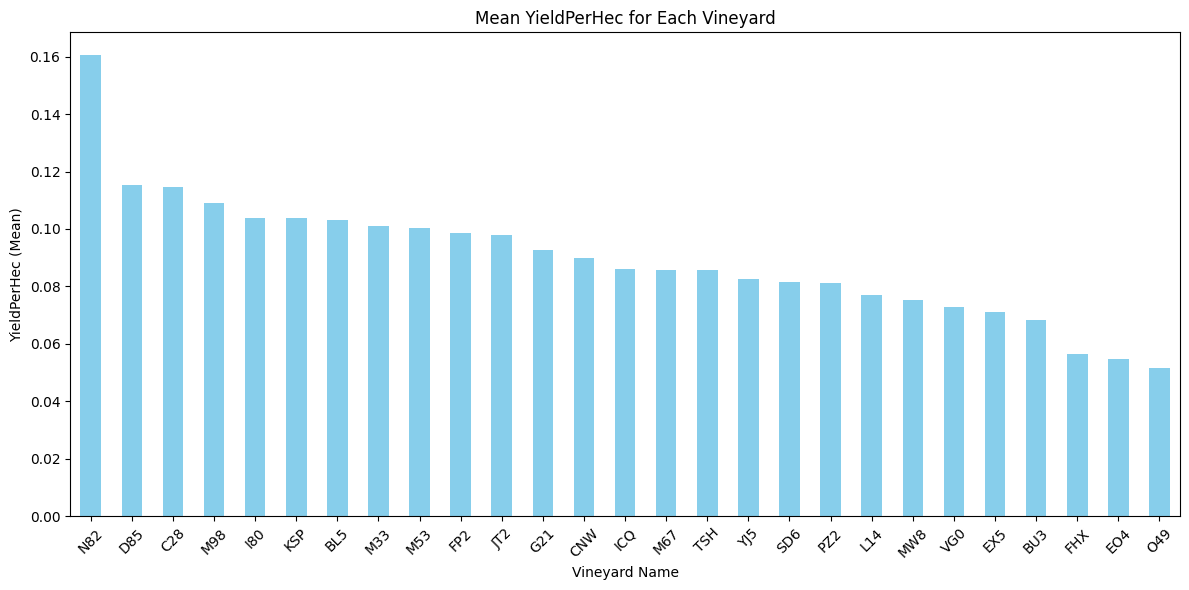

In [27]:
import matplotlib.pyplot as plt

# Group the data by Vineyard_name and calculate the mean YieldPerHec
vineyard_yield = data.groupby('Vineyard_name')['YieldPerHec'].mean().sort_values(ascending=False)

# Plot the YieldPerHec for each Vineyard_name
plt.figure(figsize=(12, 6))
vineyard_yield.plot(kind='bar', color='skyblue')
plt.xlabel('Vineyard Name')
plt.ylabel('YieldPerHec (Mean)')
plt.title('Mean YieldPerHec for Each Vineyard')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The scatter plots show the relationship between YieldPerHec (yield per hectare) and the other three continuous variables:

### 1.YieldPerHec vs NDVImean: There seems to be a positive correlation between the NDVI mean and the yield per hectare. This suggests that areas with healthier or denser vegetation (higher NDVI) tend to have higher yields.

### 2.YieldPerHec vs GDD (Growing Degree Days): The relationship between yield and GDD seems less clear. There is a wide spread of yield values for lower GDD, suggesting that other factors might be influencing yield in addition to GDD.

### 3.YieldPerHec vs Rainfall: The relationship between yield and rainfall is also not very clear from the scatter plot. While there are some high yield values at lower rainfall amounts, there is a wide spread of yield values across different rainfall amounts.

### The box plot shows the yield per hectare for each grape variety. There seems to be a difference in yield between the varieties. Some varieties, like Pinot Gris and Pinot Noir, tend to have a higher median yield, while others like Riesling and Sauvignon Blanc have a lower median yield. However, there is a considerable overlap in the yield ranges between the varieties.

### Let's now compute the correlation coefficients between these variables and yield to quantify their relationships. We'll use the Pearson correlation coefficient, which measures the linear relationship between variables. The coefficient ranges from -1 to 1, where -1 means a perfect negative linear relationship, 1 means a perfect positive linear relationship, and 0 means no linear relationship.

# Anova Testing

### Since grape variety is a categorical variable, we cannot compute a correlation coefficient. Instead, we can perform an ANOVA (Analysis of Variance) test to see if the mean yield is significantly different between the varieties. If the p-value from the ANOVA test is less than 0.05, we can conclude that there is a significant difference in yield between at least two grape varieties. Let's perform this test.

In [28]:
import scipy.stats as stats

# Perform ANOVA test
F, p = stats.f_oneway(*(data[data["Variety"]==variety]["YieldPerHec"] for variety in data["Variety"].unique()))

F, p


(2676.8336784456887, 0.0)

## The results of the ANOVA test are as follows:

### F-statistic: 2676.83
### p-value: 0.0
### Since the p-value is less than 0.05, we can conclude that there is a significant difference in yield between at least two grape varieties. This suggests that the grape variety is an important factor to consider in predicting yield.

### Finally, let's explore the impact of heat shock and frost shock on yield. We can do this by comparing the mean yield for blocks where a heat shock or frost shock occurred versus blocks where they did not occur. We can also perform a t-test to see if the difference in means is statistically significant. If the p-value from the t-test is less than 0.05, we can conclude that there is a significant difference in mean yield between the two groups. Let's perform these analyses.

In [29]:
## # Calculate mean yield for blocks where a heat shock occurred vs did not occur
heat_shock_yes = data[data["HeatShock"]==0]["YieldPerHec"].mean()
heat_shock_no = data[data["HeatShock"]==-1]["YieldPerHec"].mean()

# Perform t-test for heat shock
t_stat_heat, p_value_heat = stats.ttest_ind(data[data["HeatShock"]==0]["YieldPerHec"], data[data["HeatShock"]==-1]["YieldPerHec"])

# Calculate mean yield for blocks where a frost shock occurred vs did not occur
frost_shock_yes = data[data["FrostShock"]==0]["YieldPerHec"].mean()
frost_shock_no = data[data["FrostShock"]==-1]["YieldPerHec"].mean()

# Perform t-test for frost shock
t_stat_frost, p_value_frost = stats.ttest_ind(data[data["FrostShock"]==0]["YieldPerHec"], data[data["FrostShock"]==-1]["YieldPerHec"])

heat_shock_yes, heat_shock_no, t_stat_heat, p_value_heat, frost_shock_yes, frost_shock_no, t_stat_frost, p_value_frost


(0.09377336021850836,
 0.0932632737461296,
 0.6961426114855728,
 0.4863428851632222,
 nan,
 0.0937815755695507,
 nan,
 nan)

## The results of the analysis are as follows:

### Heat Shock:

### -Mean yield for blocks where a heat shock occurred: 0.094

### -Mean yield for blocks where a heat shock did not occur: 0.093

### -T-statistic for the t-test: 0.696

### -P-value for the t-test: 0.486

### Frost Shock:

### -Mean yield for blocks where a frost shock occurred: NaN

### -Mean yield for blocks where a frost shock did not occur: 0.094


### It appears that there might be no instances of frost shock in the dataset (encoded as 0), which resulted in NaN values for the mean yield where frost shock occurred.

### The t-statistic and p-value for the heat shock t-test suggest that there is no significant difference in yield between blocks where a heat shock occurred and blocks where it did not occur. The mean yields are also very close to each other. This suggests that heat shock might not have a significant impact on yield in this dataset.

### Based on the EDA, it appears that the most important variables for predicting yield might be the NDVI mean and the grape variety. Other variables like GDD and rainfall might also be relevant, but their impact on yield is not as clear from the data. The impact of heat shock and frost shock on yield is also not clear.

In [30]:
import pandas as pd
import scipy.stats as stats



# List of variables for which we need to perform ANOVA
variables = ['GDD', 'LAIGmean', 'NDVImean', 'NDVIRemean', 'NDWImean', 
             'PC1', 'PC2', 'RENDVI1mean', 'RENDVI2mean', 'Rainfall']

# Perform ANOVA for each variable against "Variety"
anova_results = {}
for var in variables:
    F, p = stats.f_oneway(*(data[data["Variety"] == variety][var] for variety in data["Variety"].unique()))
    anova_results[var] = (F, p)

# Print the results
for var, (F, p) in anova_results.items():
    print(f"{var}:")
    print(f"  - F-statistic: {F:.2f}")
    print(f"  - p-value: {p:.2e}\n")


GDD:
  - F-statistic: 93.42
  - p-value: 4.39e-211

LAIGmean:
  - F-statistic: 73.22
  - p-value: 3.45e-164

NDVImean:
  - F-statistic: 72.16
  - p-value: 9.73e-162

NDVIRemean:
  - F-statistic: 60.37
  - p-value: 2.40e-134

NDWImean:
  - F-statistic: 93.54
  - p-value: 2.36e-211

PC1:
  - F-statistic: 540.03
  - p-value: 0.00e+00

PC2:
  - F-statistic: 28.33
  - p-value: 4.98e-60

RENDVI1mean:
  - F-statistic: 76.60
  - p-value: 4.77e-172

RENDVI2mean:
  - F-statistic: 73.22
  - p-value: 3.45e-164

Rainfall:
  - F-statistic: 215.32
  - p-value: 0.00e+00



# Survival Analysis

In [30]:
data['Harvest'] = 1
from lifelines import CoxPHFitter

# Assuming your DataFrame is named df and 'TimeTo' is the time-to-event data
# We also assume a variable named 'Harvest' is set to 1 for all observations

# List the columns you are interested in. This should include 'Harvest' (the event indicator),
# 'TimeTo' (the time-to-event data), and any other covariates you wish to examine.
cols_of_interest = ['Harvest', 'TimeTo', 'FrostShock', 'HeatShock']

# Create an instance of the Cox proportional hazards model
cph = CoxPHFitter()

# Fit the model to your data
cph.fit(data[cols_of_interest], duration_col='TimeTo', event_col='Harvest')

# Print a summary of the fitted model
cph.print_summary()


c:\users\myer1\appdata\local\programs\python\python37\lib\site-packages\lifelines\fitters\coxph_fitter.py:1607: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.276. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  exceptions.ConvergenceWarning,


<lifelines.CoxPHFitter: fitted with 48126 total observations, 0 right-censored observations>
             duration col = 'TimeTo'
                event col = 'Harvest'
      baseline estimation = breslow
   number of observations = 48126
number of events observed = 48126
   partial log-likelihood = -456957.70
         time fit was run = 2023-08-07 14:59:11 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
FrostShock  -0.04       0.96       0.02            -0.08             0.01                 0.92                 1.01
HeatShock  -19.66       0.00      87.50          -191.16           151.84                 0.00             8.74e+65

             cmp to     z    p   -log2(p)
covariate                                
FrostShock     0.00 -1.51 0.13       2.94
HeatShock      0.00 -0.22 0.82       0.28
---
Concordance = 0.58
Partial AIC = 913919.41
log-likelihood ratio test = 27593.64 on 2 df
-log2(p) of ll-ratio test = inf

#### The Cox Proportional Hazards Model here is used to study the effect of 'FrostShock' and 'HeatShock' on 'TimeTo' (presumably time to harvest) where all records have been treated as an event ('Harvest' = 1). The key results are as follows:

1. **FrostShock**: The negative coefficient (-0.04) suggests that increased FrostShock is associated with longer survival times or delayed harvest. The exp(coef) value of 0.96 indicates that for each unit increase in FrostShock, the hazard decreases by about 4%, thereby extending the time to harvest.

2. **HeatShock**: The large negative coefficient (-19.66) implies that increased HeatShock is strongly associated with longer survival times or delayed harvest.

3. **Concordance**: The concordance index is a measure of the predictive power of the model, with 1 indicating perfect prediction and 0.5 equivalent to random chance. The model's concordance of 0.58 indicates that the model has some predictive power, but it's far from perfect.


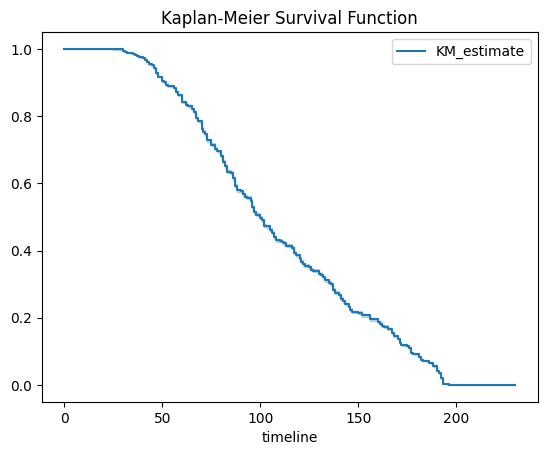

c:\users\myer1\appdata\local\programs\python\python37\lib\site-packages\lifelines\plotting.py:727: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")


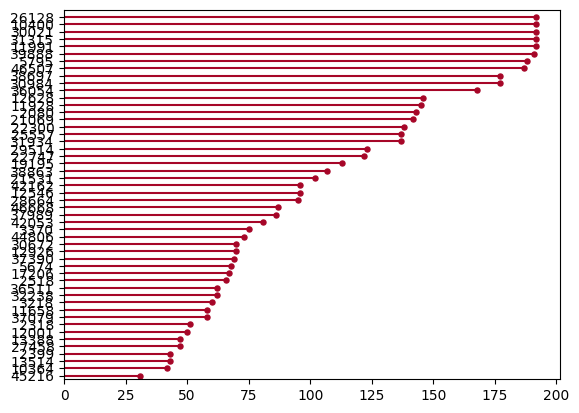

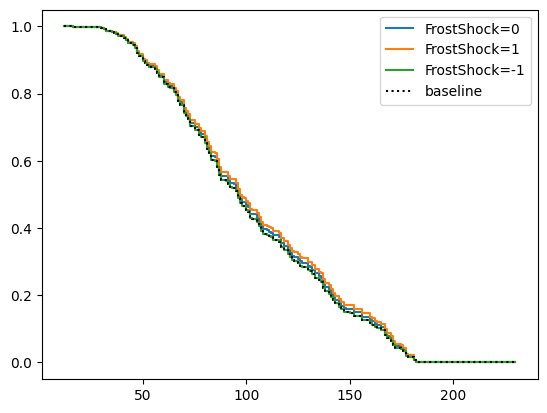

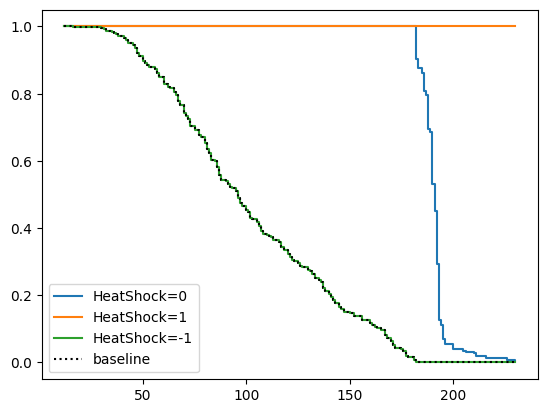

In [31]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

# Create an instance of Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data to the model
kmf.fit(data['TimeTo'], event_observed=data['Harvest'])

# Create a plot of the Kaplan-Meier estimate of the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function')
plt.show()

# Plotting a sample of lifetimes
plot_lifetimes(data['TimeTo'].sample(n=50), event_observed=data['Harvest'].sample(n=50))
plt.show()

# Hazard ratio plot
cph.plot_partial_effects_on_outcome(covariates='FrostShock', values=[0,1,-1])
cph.plot_partial_effects_on_outcome(covariates='HeatShock', values=[0,1,-1])
plt.show()


# Yield Scale Analysis

In [32]:
pd.crosstab(data['Variety'], data['YieldScale'])

YieldScale          High yield  Low yield
Variety                                  
Cabernet Sauvignon           0       1157
Chardonnay                   0       5396
Marzemino                   50          0
Merlot                       0        187
Pinot Gris                   0       2480
Pinot Noir                   0      11056
Rare Red                     0        722
Rare White                   0         45
Riesling                     0        790
Sauvignon Blanc          24005          0
Sauvignon Gris               0       1745
Syrah                        0        493

In [33]:
data.groupby(['Variety', 'YieldScale'])['YieldPerHec'].mean()


Variety             YieldScale
Cabernet Sauvignon  Low yield     0.084818
Chardonnay          Low yield     0.068468
Marzemino           High yield    0.127192
Merlot              Low yield     0.072960
Pinot Gris          Low yield     0.079445
Pinot Noir          Low yield     0.056767
Rare Red            Low yield     0.080266
Rare White          Low yield     0.092050
Riesling            Low yield     0.075241
Sauvignon Blanc     High yield    0.119627
Sauvignon Gris      Low yield     0.083047
Syrah               Low yield     0.081342
Name: YieldPerHec, dtype: float64

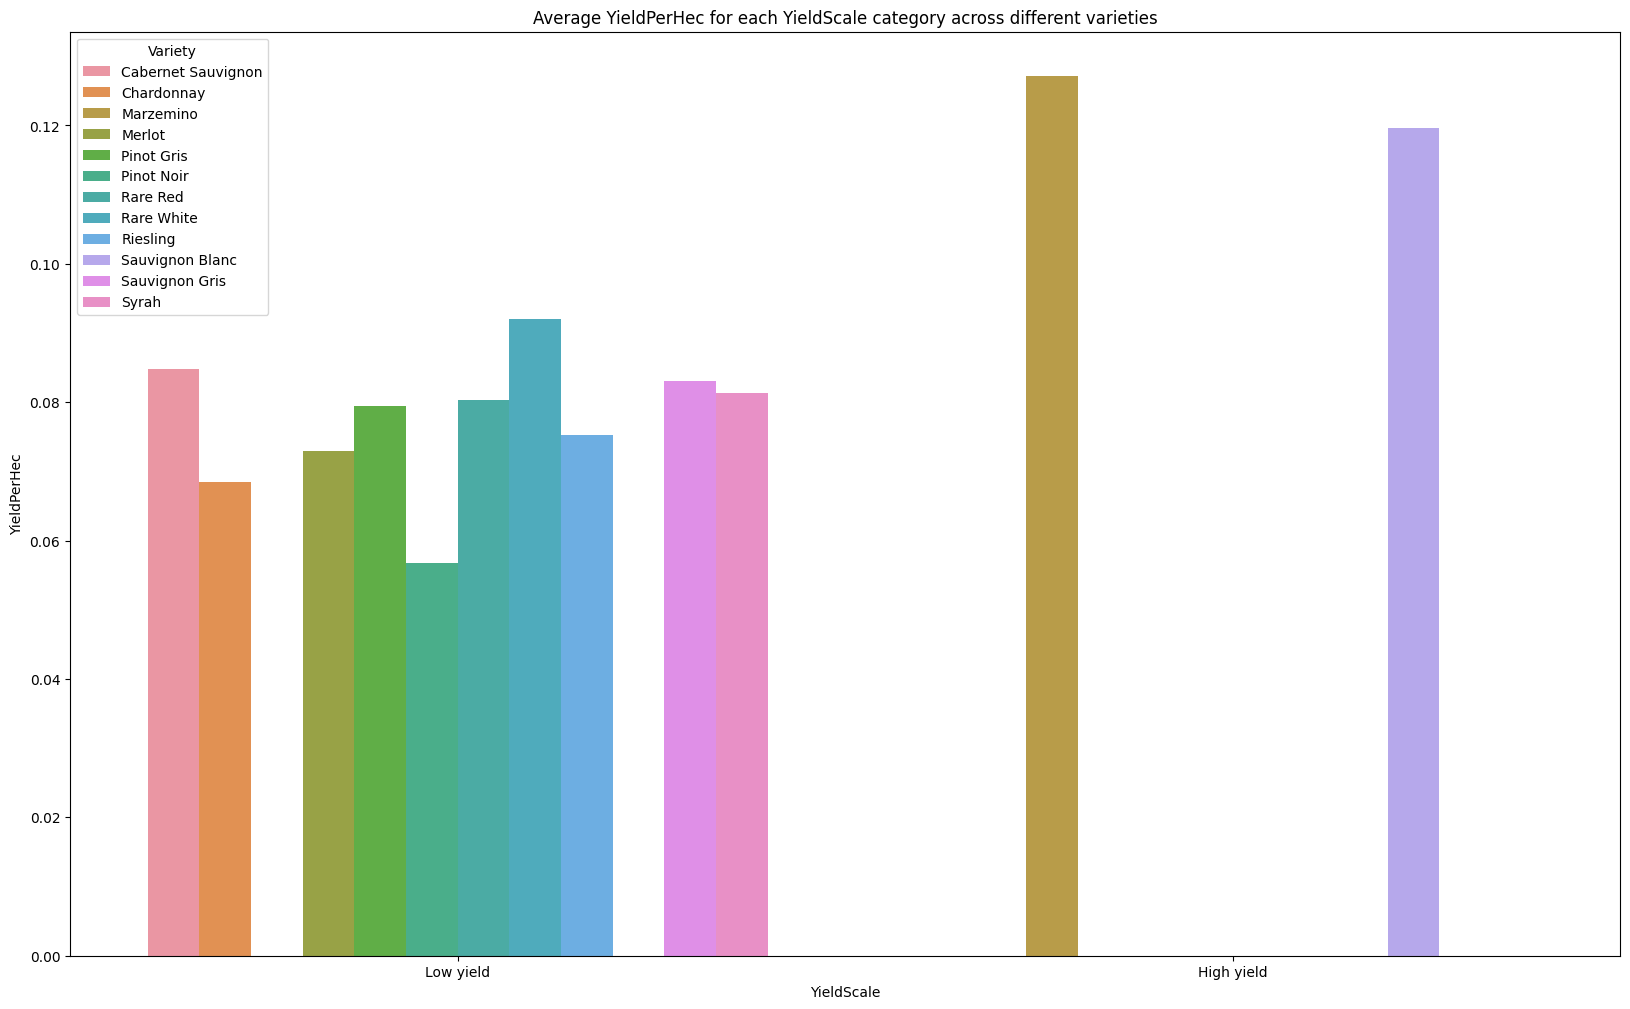

In [34]:
yield_scale_means = data.groupby(['Variety', 'YieldScale'])['YieldPerHec'].mean().reset_index()

plt.figure(figsize=(20,12))
sns.barplot(x='YieldScale', y='YieldPerHec', hue='Variety', data=yield_scale_means)
plt.title('Average YieldPerHec for each YieldScale category across different varieties')
plt.show()


In [35]:
# Group by vineyard and block, then compute the average yield
average_yield_per_block = data.groupby(['Vineyard_name', 'Block_name'])['Yield'].mean()

# Now you can sort this to find which blocks have the highest and lowest yield on average
highest_yield_blocks = average_yield_per_block.sort_values(ascending=False)
lowest_yield_blocks = average_yield_per_block.sort_values(ascending=True)

# You can then print out the blocks with the highest and lowest yield
print('Blocks with highest average yield:')
print(highest_yield_blocks.head())

print('Blocks with lowest average yield:')
print(lowest_yield_blocks.head())

Blocks with highest average yield:
Vineyard_name  Block_name
C28            K51TDOF       359.858450
               B62KTFH       306.488988
KSP            ZIFJSEY       299.168860
M53            B64KTFK       273.416258
KSP            RZWXPCP       220.083955
Name: Yield, dtype: float64
Blocks with lowest average yield:
Vineyard_name  Block_name
FP2            GQ8MEQB       1.477000
EX5            VP2RQRR       1.578512
MW8            PZ6VNZL       1.748583
ICQ            XRGPOQY       1.898000
VG0            QB0HFNK       2.115439
Name: Yield, dtype: float64


In [36]:
# Group by vineyard, then compute the average yield
average_yield_per_vineyard = data.groupby(['Vineyard_name'])['Yield'].mean()

# Now you can sort this to find which vineyards have the highest and lowest yield on average
highest_yield_vineyards = average_yield_per_vineyard.sort_values(ascending=False)
lowest_yield_vineyards = average_yield_per_vineyard.sort_values(ascending=True)

# You can then print out the vineyards with the highest and lowest yield
print('Vineyards with highest average yield:')
print(highest_yield_vineyards.head())

print('Vineyards with lowest average yield:')
print(lowest_yield_vineyards.head())


Vineyards with highest average yield:
Vineyard_name
KSP    129.547208
M98     90.905128
C28     83.052588
N82     77.073399
M53     69.217576
Name: Yield, dtype: float64
Vineyards with lowest average yield:
Vineyard_name
O49    11.824242
EX5    22.305570
FHX    23.656369
ICQ    24.560881
L14    29.277322
Name: Yield, dtype: float64


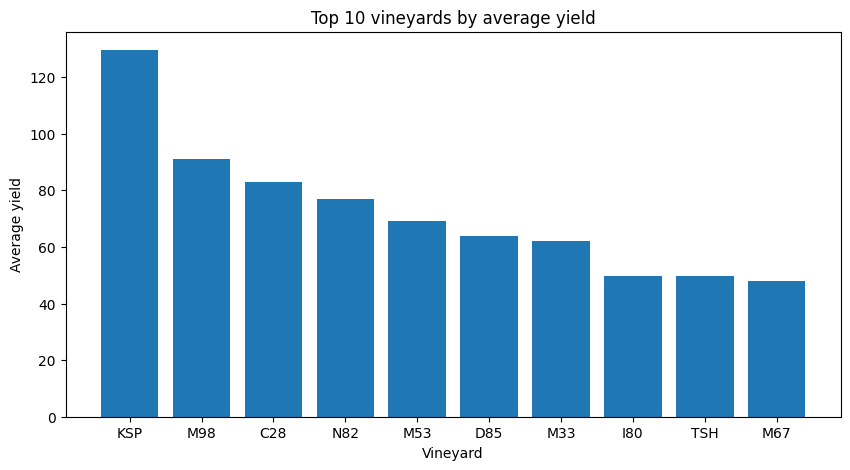

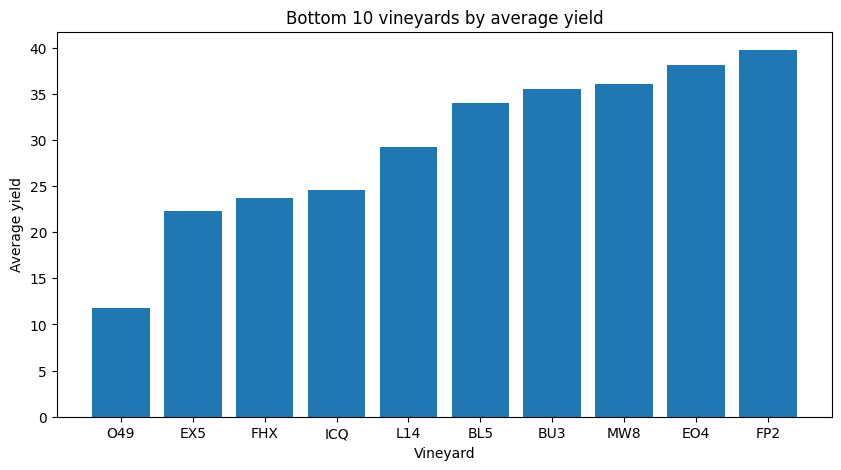

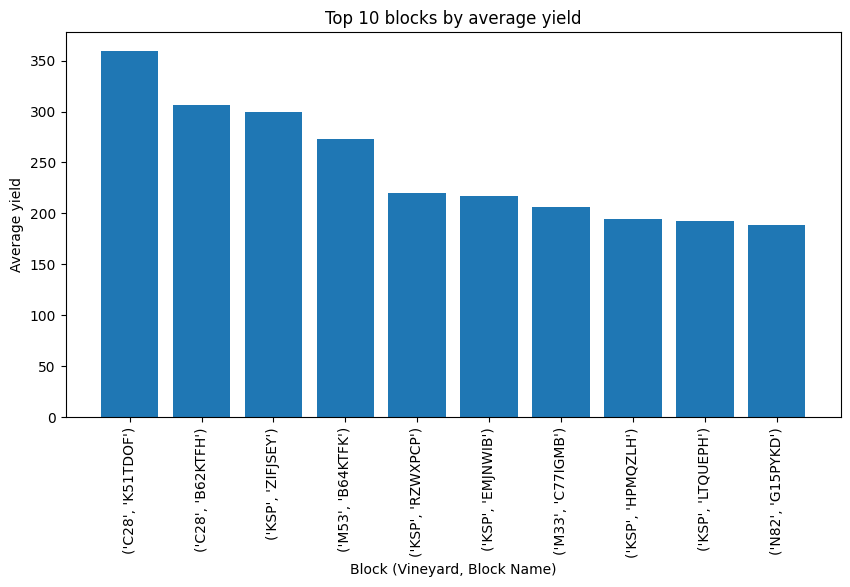

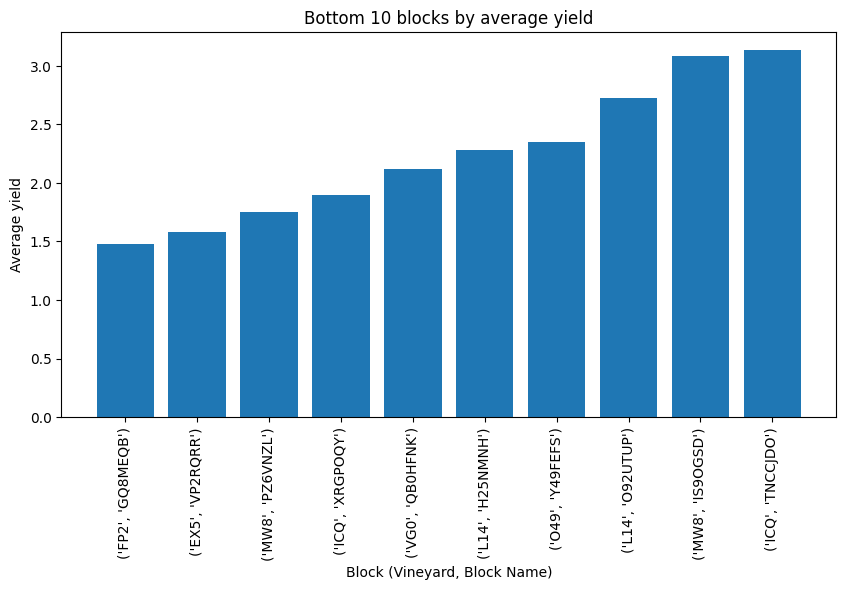

In [37]:
import matplotlib.pyplot as plt

# Get top 10 and bottom 10 vineyards by average yield
top_10_vineyards = highest_yield_vineyards.head(10)
bottom_10_vineyards = lowest_yield_vineyards.head(10)

# Plot for vineyards
plt.figure(figsize=(10, 5))
plt.bar(top_10_vineyards.index, top_10_vineyards.values)
plt.xlabel('Vineyard')
plt.ylabel('Average yield')
plt.title('Top 10 vineyards by average yield')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(bottom_10_vineyards.index, bottom_10_vineyards.values)
plt.xlabel('Vineyard')
plt.ylabel('Average yield')
plt.title('Bottom 10 vineyards by average yield')
plt.show()

# Get top 10 and bottom 10 blocks by average yield
top_10_blocks = highest_yield_blocks.head(10)
bottom_10_blocks = lowest_yield_blocks.head(10)

# Plot for blocks
plt.figure(figsize=(10, 5))
plt.bar(range(len(top_10_blocks)), top_10_blocks.values)
plt.xticks(range(len(top_10_blocks)), [str(tup) for tup in top_10_blocks.index], rotation=90)
plt.xlabel('Block (Vineyard, Block Name)')
plt.ylabel('Average yield')
plt.title('Top 10 blocks by average yield')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(len(bottom_10_blocks)), bottom_10_blocks.values)
plt.xticks(range(len(bottom_10_blocks)), [str(tup) for tup in bottom_10_blocks.index], rotation=90)
plt.xlabel('Block (Vineyard, Block Name)')
plt.ylabel('Average yield')
plt.title('Bottom 10 blocks by average yield')
plt.show()


## The Proportion of Each Variety in Each Vineyard

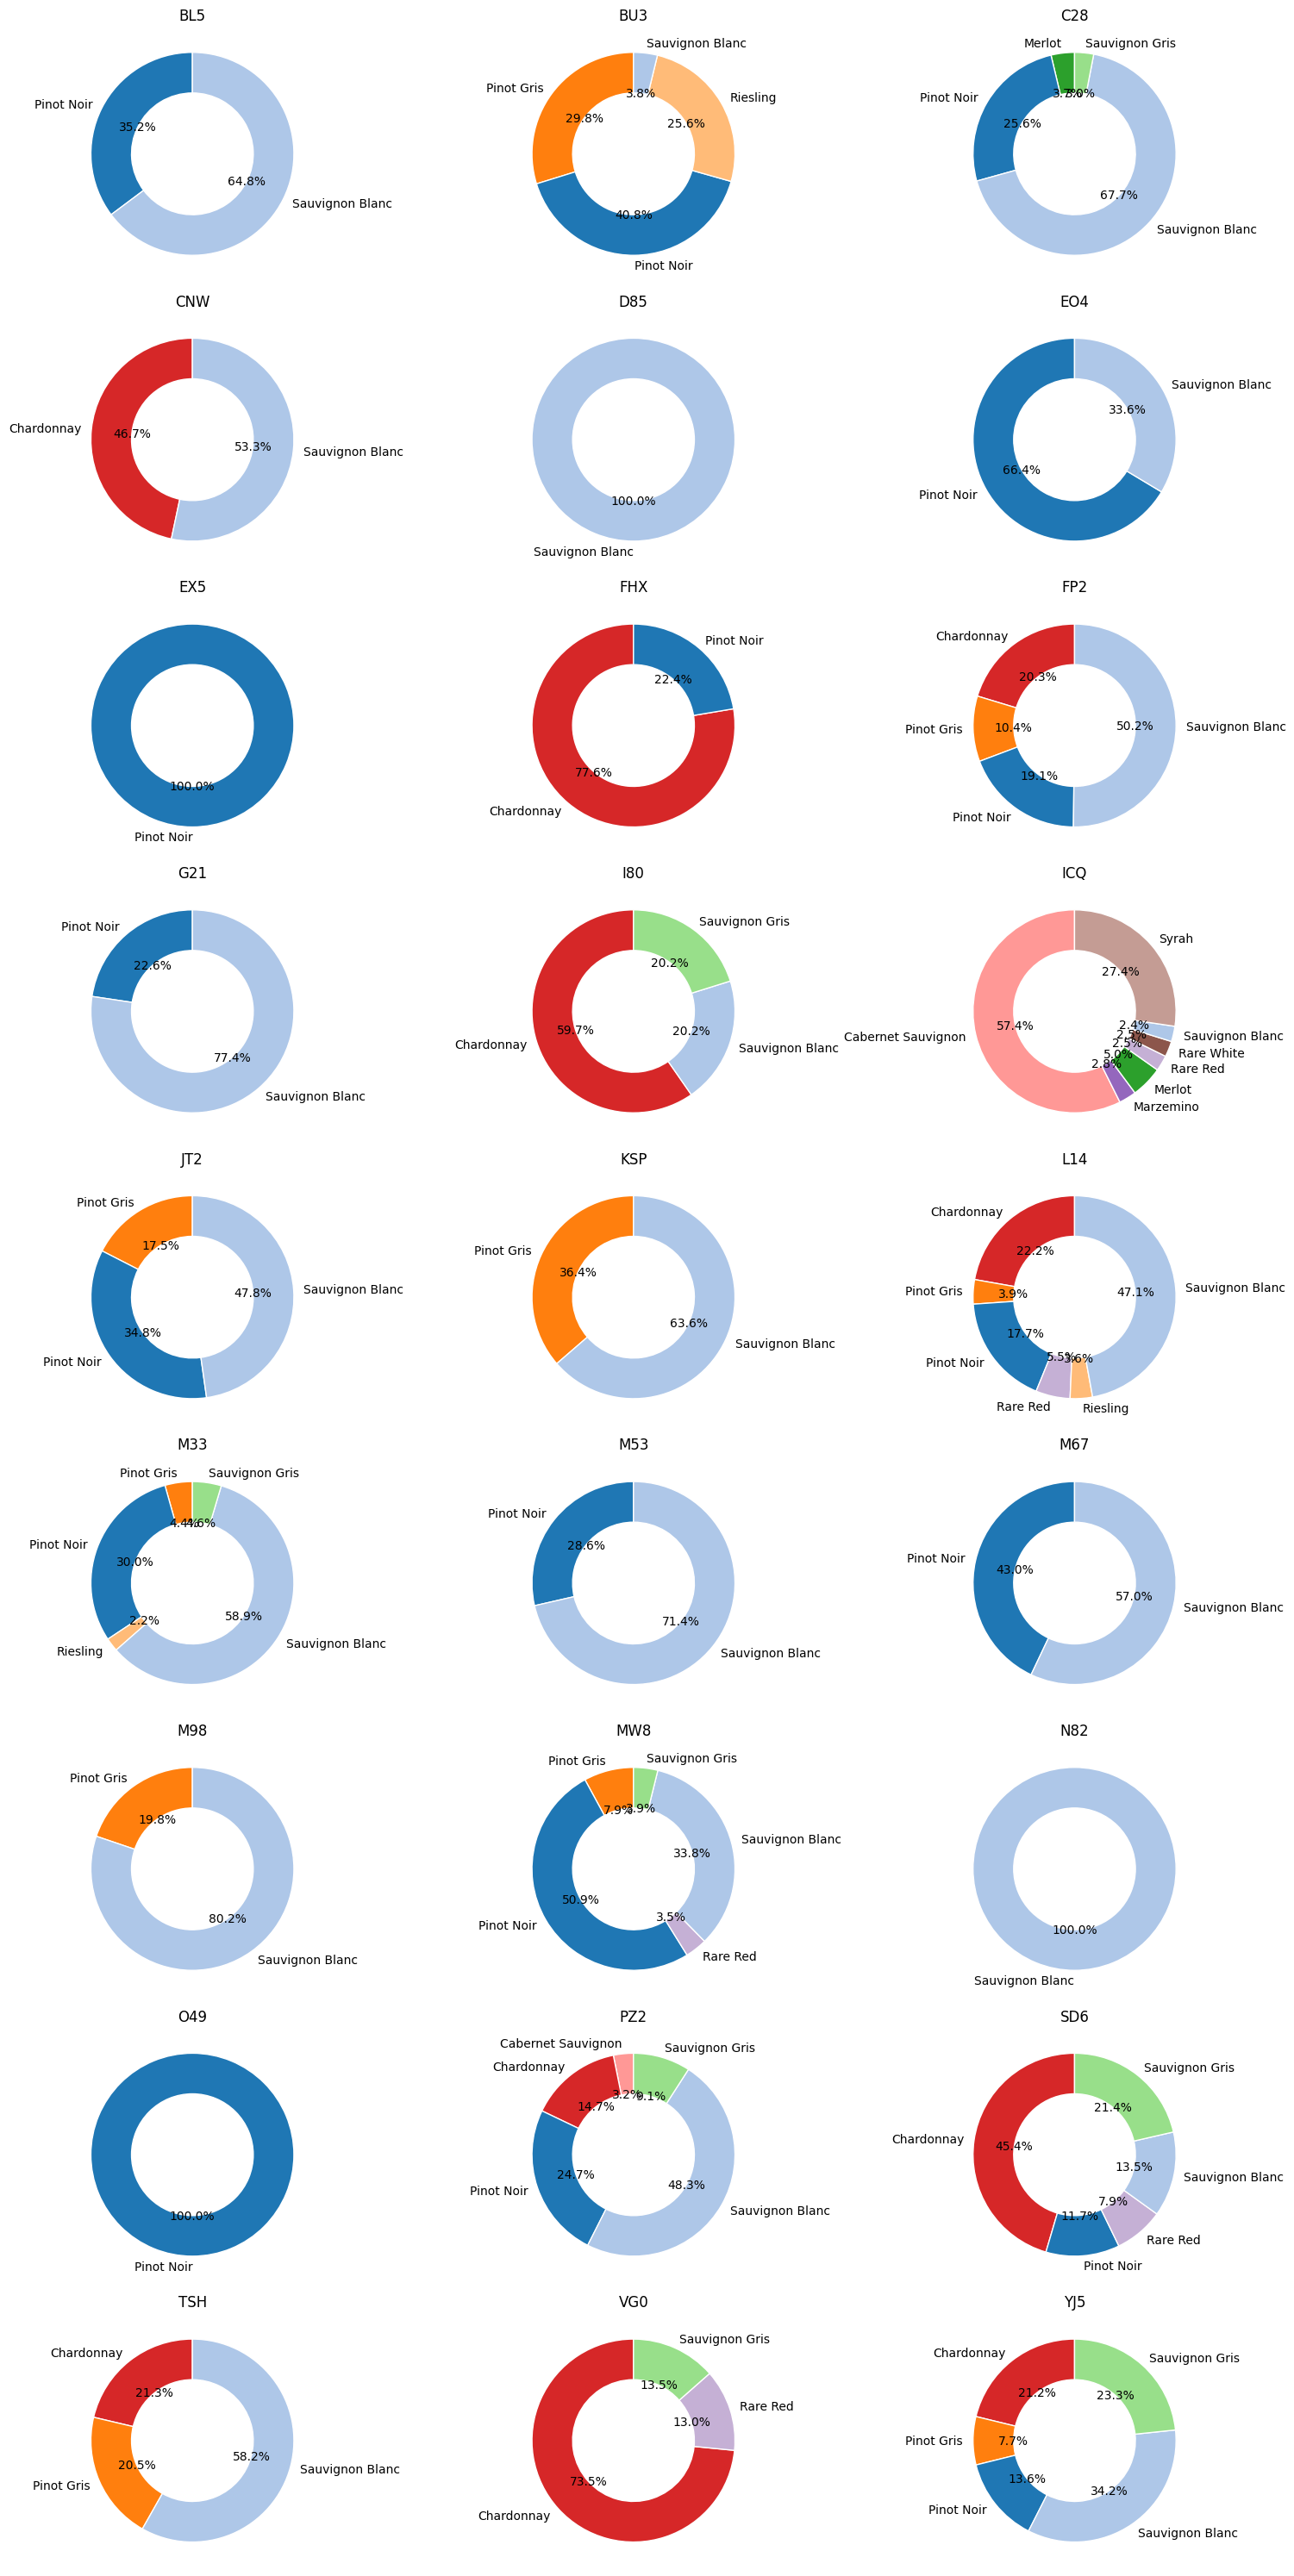

In [38]:
import matplotlib.cm as cm

# Extract relevant data
df = data.groupby(['Vineyard_name', 'Variety']).size().unstack()

# Fill missing values with 0
df = df.fillna(0)

# Set the figure size and subplot layout
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 30))

# Create a dictionary to map each variety to a unique color
color_dict = {}

# Iterate over each Vineyard_name
for (vineyard, variety_counts), ax in zip(df.iterrows(), axes.flatten()):
    # Check if all values in variety_counts are zero
    if not all(variety_counts == 0):
        # Exclude zero-valued slices from the pie chart
        non_zero_counts = variety_counts[variety_counts != 0]
        non_zero_labels = non_zero_counts.index
        
        # Iterate over each variety and assign a unique color
        for variety in non_zero_labels:
            if variety not in color_dict:
                # Generate a unique color for the variety
                color_dict[variety] = cm.get_cmap('tab20')(len(color_dict))
        
        # Assign colors to the varieties in the current pie chart
        colors = [color_dict[variety] for variety in non_zero_labels]
        
        wedges, _, _ = ax.pie(non_zero_counts, labels=non_zero_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
        plt.setp(wedges, width=0.4)
        ax.set_title(vineyard)

# Adjust subplot spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

#### As we can see that Sauvignon Blanc has the highest percentage of Variety in all Vineyards

## Time Series Plot with Rainfall, GDD and YieldPerHec in each Vineyard

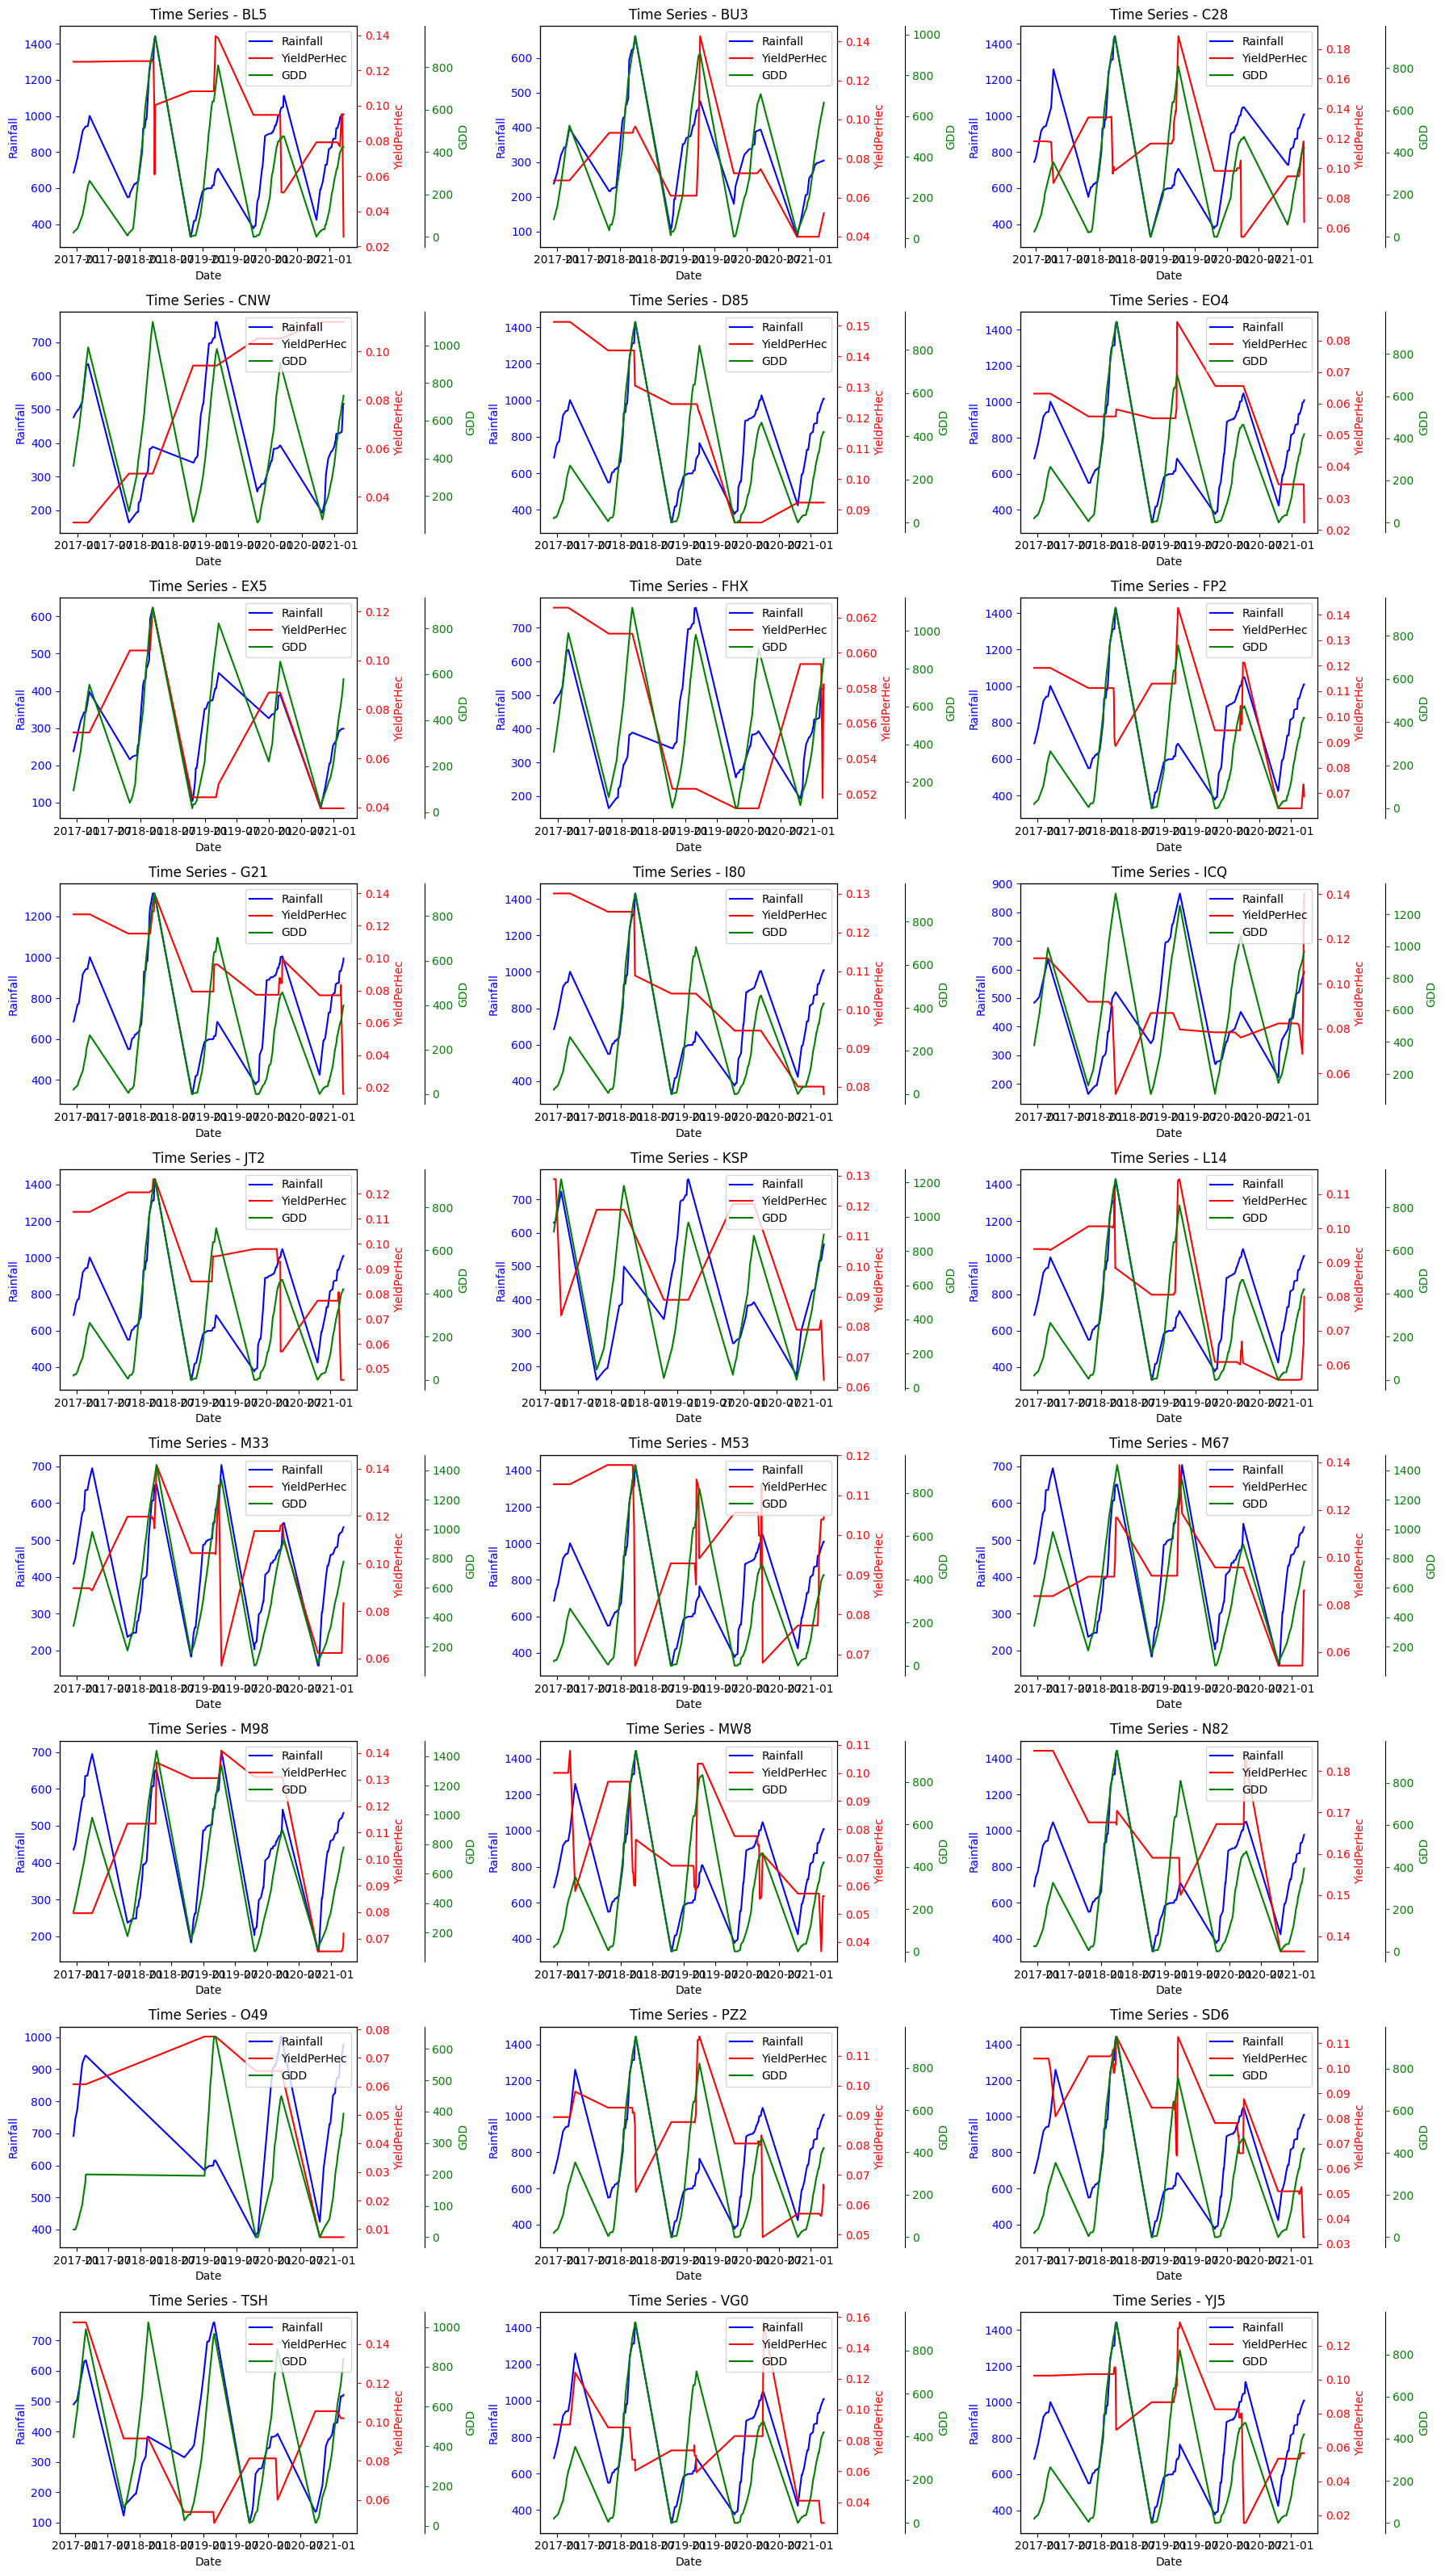

In [39]:
# Extract relevant data
df = data[['Vineyard_name', 'Rainfall', 'GDD','YieldPerHec', 'Date']]

# Sort the data
df = df.sort_values('Date')

# Group the data by vineyard
grouped = df.groupby('Vineyard_name')

# Create a 9x3 subplot layout
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(18, 32))

# Iterate over each vineyard and plot the time series
for i, (vineyard, group) in enumerate(grouped):
    # Calculate the row and column indices in the layout
    row = i // 3
    col = i % 3
    
    # Create a primary and secondary y-axis
    ax = axes[row, col]
    ax2 = ax.twinx()  # Secondary y-axis
    
    # Create a time series of daily rainfall using pivot table
    time_series_rainfall = pd.pivot_table(group, values='Rainfall', index='Date', columns='Vineyard_name')
    
    # Create a time series of daily YieldPerHec using pivot table
    time_series_yield = pd.pivot_table(group, values='YieldPerHec', index='Date', columns='Vineyard_name')
    
    # Create a time series of daily GDD using pivot table
    time_series_gdd = pd.pivot_table(group, values='GDD', index='Date', columns='Vineyard_name')
    
    # Plot the rainfall curve with blue color and set the legend label
    ax.plot(time_series_rainfall, color='blue', label='Rainfall')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rainfall')
    
    # Plot the YieldPerHec curve with red color and set the legend label
    ax2.plot(time_series_yield, color='red', label='YieldPerHec')
    ax2.set_ylabel('YieldPerHec')
    
    # Plot the GDD curve with green color and set the legend label
    ax3 = ax.twinx()  # Secondary y-axis
    ax3.spines['right'].set_position(('outward', 60))  # Move the twin axis
    ax3.plot(time_series_gdd, color='green', label='GDD')
    ax3.set_ylabel('GDD')
    
    # Set the label color and tick color for the primary and secondary y-axis
    ax.yaxis.label.set_color('blue')
    ax2.yaxis.label.set_color('red')
    ax3.yaxis.label.set_color('green')
    ax.tick_params(axis='y', colors='blue')
    ax2.tick_params(axis='y', colors='red')
    ax3.tick_params(axis='y', colors='green')
    
    # Combine the legend handles and labels from all axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

    # Set the title for the subplot
    ax.set_title(f'Time Series - {vineyard}')

# Adjust spacing and layout between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Rainfall and GDD have mostly similar trends, and affect the total amount of yield in most Vineyards

## Time Series Plot with Time to Harvest and Rainfall by each Variety

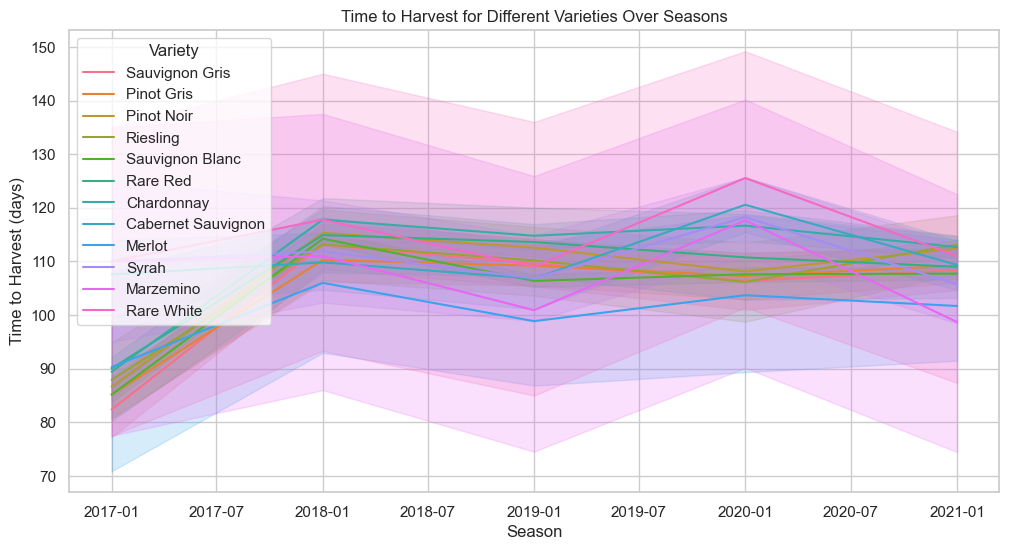

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure that your 'Season' or 'Date' column is in datetime format
data['Season'] = pd.to_datetime(data['Season'], dayfirst=True)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a plot of 'TimeTo' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='TimeTo', hue='Variety', data=data)
plt.title('Time to Harvest for Different Varieties Over Seasons')
plt.xlabel('Season')
plt.ylabel('Time to Harvest (days)')
plt.show()


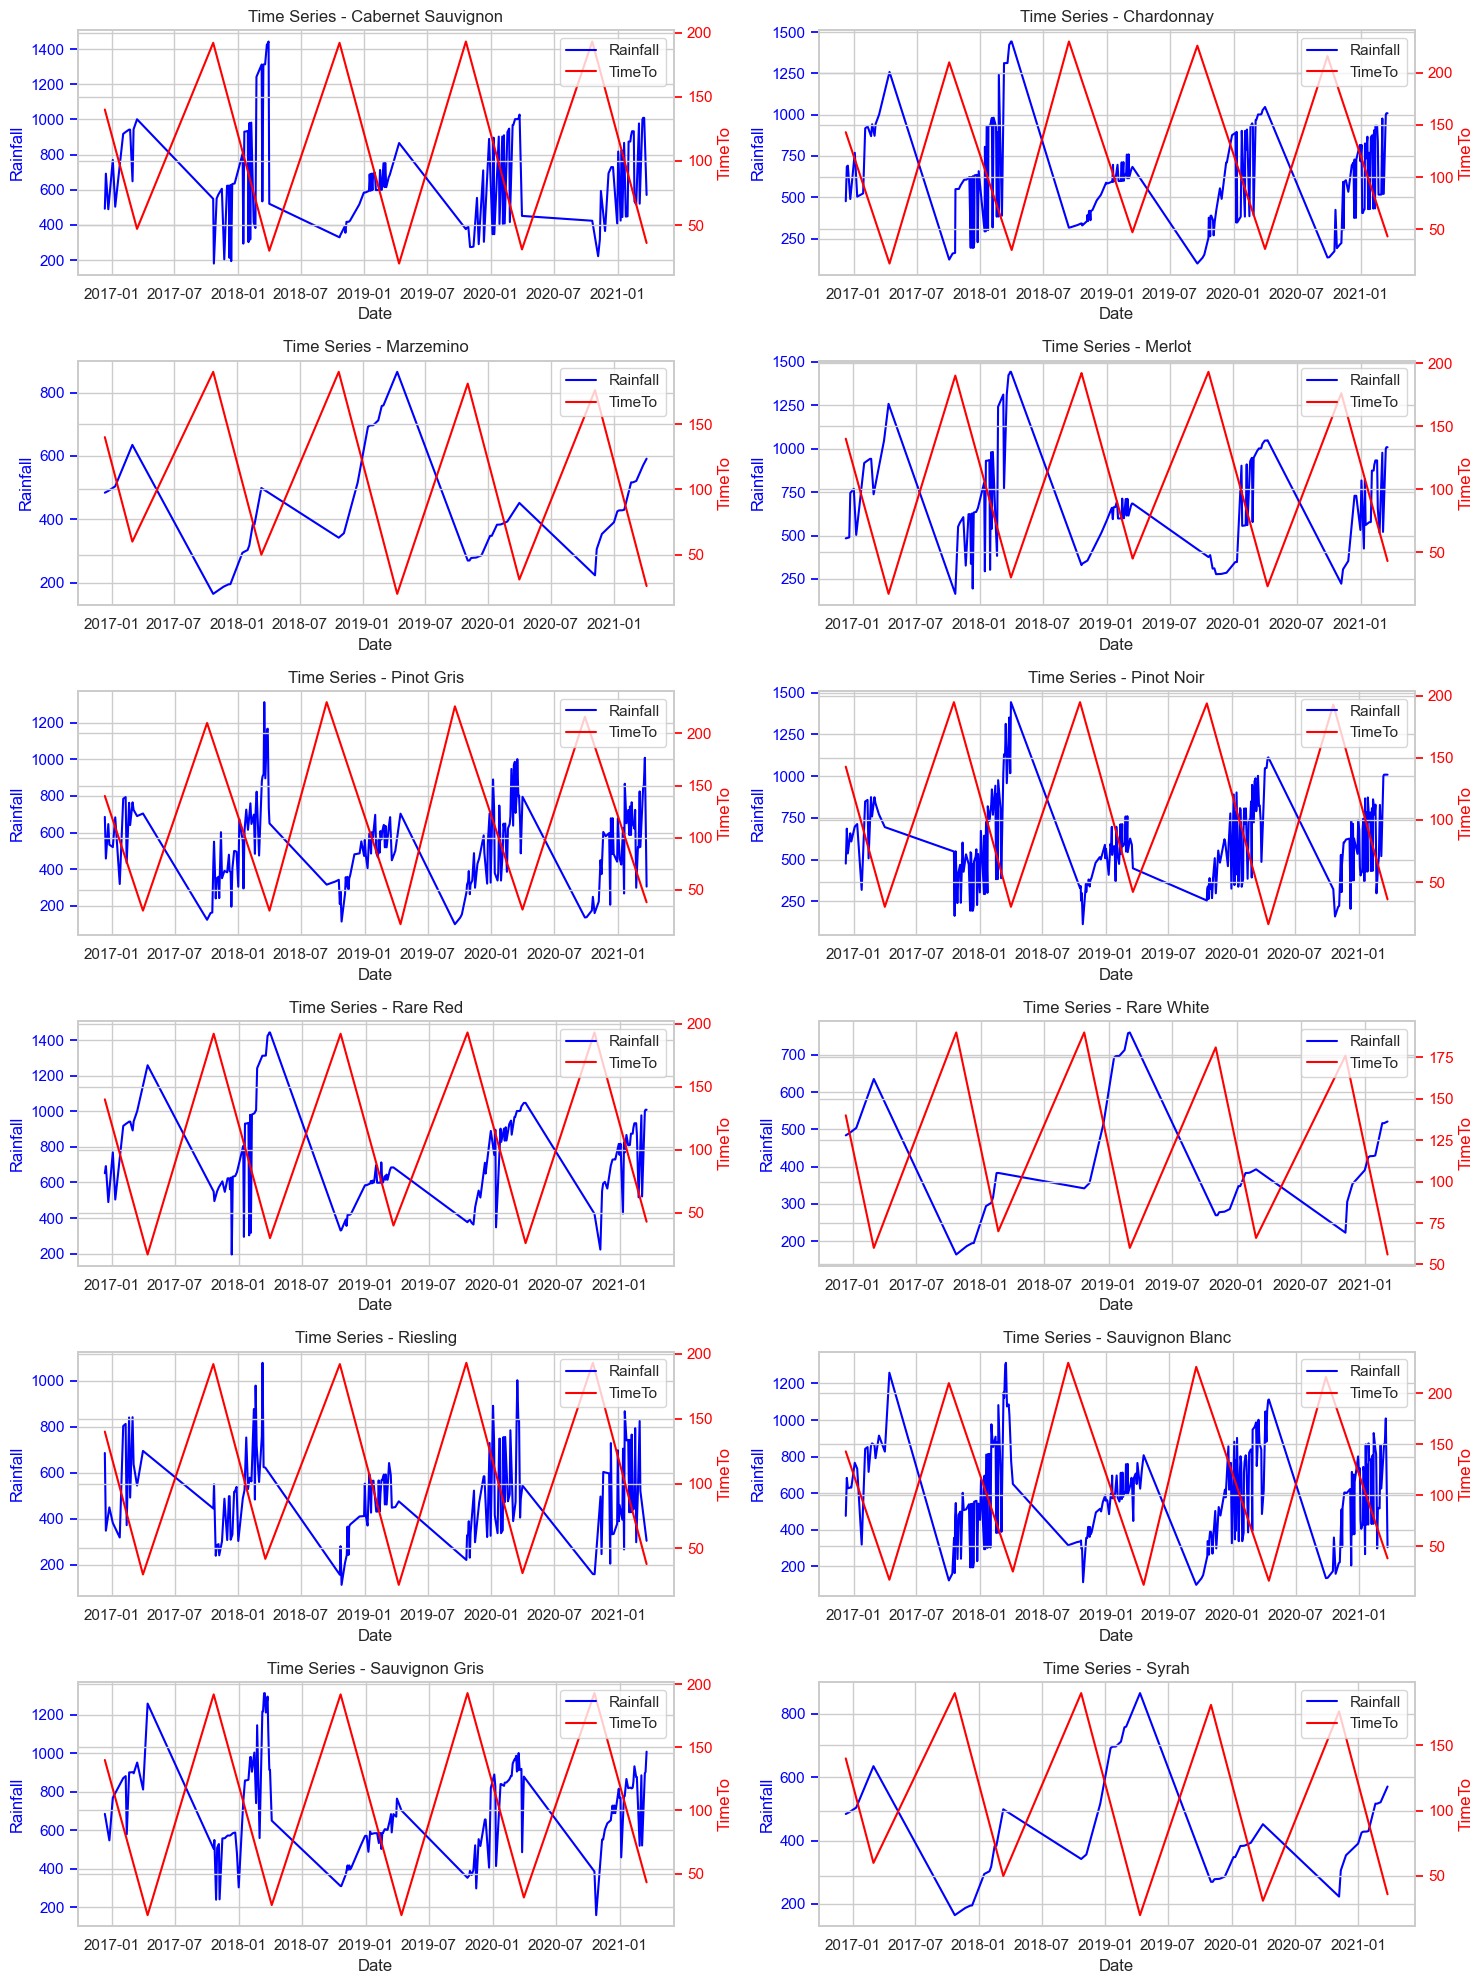

In [41]:
# Extract relevant data
df = data[['Variety', 'Rainfall', 'TimeTo', 'Date']]

# Sort the data
df = df.sort_values('Date')

# Group the data by variety
grouped = df.groupby('Variety')

# Create a 4x3 subplot layout
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Iterate over each variety and plot the time series
for i, (variety, group) in enumerate(grouped):
    # Calculate the row and column indices in the layout
    row = i // 2
    col = i % 2
    
    # Create a primary and secondary y-axis
    ax = axes[row, col]
    ax2 = ax.twinx()  # Secondary y-axis
    
    # Create a time series of daily rainfall using pivot table
    time_series_rainfall = pd.pivot_table(group, values='Rainfall', index='Date', columns='Variety')
    
    # Create a time series of daily TimeTo using pivot table
    time_series_timeto = pd.pivot_table(group, values='TimeTo', index='Date', columns='Variety')
    
    # Plot the rainfall curve with blue color and set the legend label
    ax.plot(time_series_rainfall, color='blue', label='Rainfall')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rainfall')
    
    # Plot the TimeTo curve with red color and set the legend label
    ax2.plot(time_series_timeto, color='red', label='TimeTo')
    ax2.set_ylabel('TimeTo')
    
    # Set the label color and tick color for the primary and secondary y-axis
    ax.yaxis.label.set_color('blue')
    ax2.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='blue')
    ax2.tick_params(axis='y', colors='red')
    
    # Combine the legend handles and labels from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set the title for the subplot
    ax.set_title(f'Time Series - {variety}')

# Adjust spacing and layout between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### From the correlation heatmap, we can find out that the variable 'TimeTo' has the negative correlation with 'Rainfall' and 'GDD', -0.59 and -0.76, respectively. Furthermore, we can discover this from the time series plot, when the TimeTo line goes up, the amount of Rainfall drops, and this means that if there are no enough rainfall, the grapes need more time to be harvested.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48126 entries, 0 to 48125
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Vineyard_name           48126 non-null  object        
 1   Block_name              48126 non-null  object        
 2   Season                  48126 non-null  datetime64[ns]
 3   Date                    48126 non-null  datetime64[ns]
 4   Variety                 48126 non-null  object        
 5   NDVImean                48126 non-null  float64       
 6   NDWImean                48126 non-null  float64       
 7   NDVIRemean              48126 non-null  float64       
 8   TCARImean               48126 non-null  float64       
 9   SIPImean                48126 non-null  float64       
 10  RRENDVImean             48126 non-null  float64       
 11  RN2NDVImean             48126 non-null  float64       
 12  GNDVImean               48126 non-null  float6